# Grouping and user analysis for the app "eBash"

## Project related materials: <a class = "tocSkip">
* [Presentation](https://drive.google.com/file/d/1tbqgSHN9Lgvx21Ajt3OaprpklCTnjLIw/view?usp=share_link)
* [Tableau dashboard](https://public.tableau.com/views/Mobile_App_events_by_type/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)

## Project purpose

For app **`eBash`** we should complete the following tasks:

1. **Divide users into groups** based on:
    * Retention Rate,
    * Duration time in the app,
    * Action frequency,
    * Conversion to aciton


2. Basing on exploratory data analysis we should **check hypotheses**:
    * Some users installed the app by link from `yandex` , some — by `google`. Hypothesis: these two groups has unequal conversions in `contact show` 
    * Users, who checked photos, have higher conversion vs ones who did not
    
    
3. **Give additional recommendations** based on the analysis


4. Build dashboard in **Tableau** based on criterias:
    * Build distribution diagram of `event count` based on `event time`
    * Add user count indicator
    * Add filter by `event date`

## Data description

Dataset has data about events / actions made in mobile app `"eBash"`. It is a classified advertisements app where users place their own (new or used) things, goods and etc.

Dataset has user data who first made a purchase since `7th Oct 2019`.

Dataset `mobile_dataset.csv` includes columns:
* `event.time` — event time
* `event.name` — event name
* `user.id` — user identification number

Dataset `mobile_sources.csv` includes columns:
* `userId` — user identification number
* `source` — source, where from the user installed the app

Events description:
* `advert_open` — ads is opened
* `photos_show` — photos show of an ad
* `tips_show` — user saw recommended ads
* `tips_click` — user click on a recommended ad 
* `contacts_show` and `show_contacts` — user pressed "show telephone number" button in ads
* `contacts_call` — user called by number in ads
* `map` — user opened ads map 
* `search_1` — `search_7` — various actions related to search by site
* `favorites_add` — ads was added to favorites

## Action plan

1. Read files
2. Make data preprocessing
3. Make exploratory data analysis
4. Divided users into groups and check their Retention and Conversion rates
5. Check 2 Hypotheses
6. Give final conclusion
    * Prepare a presentation
    * Create a dashboard
    * Write conslusions

## Data preprocessing

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns

from scipy import stats as st
import math as mth

import plotly.express as px
from plotly import graph_objects as go

from statsmodels.stats.weightstats import ztest as ztest

### Read files

In [2]:
mobile_sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_sources.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
display(mobile_sources.head())
mobile_sources.info()

userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [4]:
mobile_sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

In [5]:
display(mobile_dataset.head())
mobile_dataset.info()

event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


### Columns format and names

#### Columns names

* Let's change in `mobile_sources`

In [6]:
mobile_sources = mobile_sources.rename(columns={'userId': 'user_id'})

In [7]:
mobile_sources.head(1)

user_id source
0  020292ab-89bc-4156-9acf-68bc2783f894  other

* Now in `mobile_dataset`

In [8]:
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 
                                                'event.name': 'event_name', 
                                                'user.id': 'user_id'})

In [9]:
mobile_dataset.head(1)

event_time   event_name  \
0  2019-10-07 00:00:00.431357  advert_open   

                                user_id  
0  020292ab-89bc-4156-9acf-68bc2783f894

#### Columns format

Change column `event_time` of `mobile_dataset` df to datetime format

In [10]:
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

In [11]:
mobile_dataset.head(1)

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   

                                user_id  
0  020292ab-89bc-4156-9acf-68bc2783f894

In [12]:
mobile_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


### Dublicates and missing values

#### Duplicates 

* `mobile_datasets`

First check unobvious duplicates (no errors in `event_name`), after that will make a full duplicate check

In [13]:
sorted(mobile_dataset['event_name'].unique())

['advert_open',
 'contacts_call',
 'contacts_show',
 'favorites_add',
 'map',
 'photos_show',
 'search_1',
 'search_2',
 'search_3',
 'search_4',
 'search_5',
 'search_6',
 'search_7',
 'show_contacts',
 'tips_click',
 'tips_show']

There are two different names with the same meaning: `contacts_show` and `show_contacts`

Let's change it all to one name: `contacts_show`

In [14]:
# with `replace` change values with the new one
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace('show_contacts', 'contacts_show')

In [15]:
# check
sorted(mobile_dataset['event_name'].unique())

['advert_open',
 'contacts_call',
 'contacts_show',
 'favorites_add',
 'map',
 'photos_show',
 'search_1',
 'search_2',
 'search_3',
 'search_4',
 'search_5',
 'search_6',
 'search_7',
 'tips_click',
 'tips_show']

Done. Now go to full duplicates

In [16]:
mobile_dataset.duplicated().sum()

0

* `mobile_sources`

Let's make full duplicate check in sources

In [17]:
mobile_sources.duplicated().sum()

0

#### Errors

Now check that each user has one source (from where he installed the app)

In [18]:
# grouping by users, counting sources per user and leaving unique counts
mobile_sources.groupby('user_id').agg({'source': 'count'})['source'].unique()

array([1], dtype=int64)

Only one source per user

#### Missing values

* Now we count missing values per each dataset

In [19]:
mobile_sources.isna().sum()

user_id    0
source     0
dtype: int64

In [20]:
mobile_dataset.isna().sum()

event_time    0
event_name    0
user_id       0
dtype: int64

No missings in each dataset

* Let's also check that each user is represented in the other data set

Making a cross check of unique users vs the other dataset

In [21]:
mobile_sources['user_id'] in mobile_dataset['user_id'].agg('unique')

True

In [22]:
mobile_dataset['user_id'].unique() in mobile_sources['user_id'].unique()

True

Now make one more check with unique user count

In [23]:
(
    mobile_sources.groupby('user_id').agg('count').reset_index().drop(labels='source', axis=1) == \
    mobile_dataset.groupby('user_id').agg('count').reset_index().drop(labels=['event_time', 
                                                                              'event_name'], axis=1)
)['user_id'].sum()

4293

4293 matches. Now per each dataset

In [24]:
display(mobile_sources.groupby('user_id').agg('count').reset_index().drop(labels='source', axis=1).count())

mobile_dataset.groupby('user_id').agg('count').reset_index().drop(labels=['event_time', 'event_name'], axis=1).count()

user_id    4293
dtype: int64

user_id    4293
dtype: int64

Good, full match. Moving on

### User Session

For the further analysis we should identify user session

It is suggested to have `30-min interval` between actions, so that we could treat a long break as a new session start

In [25]:
# sorting data by user and event time
mobile_dataset = mobile_dataset.sort_values(['user_id', 'event_time'])

In [26]:
# new var with diff between actions
diff_timestamp = mobile_dataset.groupby('user_id')['event_time'].diff()

# new vat `new_session` where we mark when the new session should start after 30 min break
new_session = (diff_timestamp.isnull()) | (diff_timestamp > pd.Timedelta('30Min'))

# marking `session_id` for each user
mobile_dataset['session_id'] = mobile_dataset.loc[new_session, ['user_id', 'event_time']] \
    .groupby('user_id').rank(method='first').astype(int)

# filling all NaN in session_id's (NaN appears, as new session is not marked there)
mobile_dataset['session_id'] = mobile_dataset['session_id'].fillna(method='ffill').astype(int)

In [27]:
# check
mobile_dataset.head(20)

event_time event_name  \
805   2019-10-07 13:39:45.989359  tips_show   
806   2019-10-07 13:40:31.052909  tips_show   
809   2019-10-07 13:41:05.722489  tips_show   
820   2019-10-07 13:43:20.735461  tips_show   
830   2019-10-07 13:45:30.917502  tips_show   
831   2019-10-07 13:45:43.212340  tips_show   
832   2019-10-07 13:46:31.033718  tips_show   
836   2019-10-07 13:47:32.860234  tips_show   
839   2019-10-07 13:49:41.716617  tips_show   
6541  2019-10-09 18:33:55.577963        map   
6546  2019-10-09 18:35:28.260975        map   
6565  2019-10-09 18:40:28.738785  tips_show   
6566  2019-10-09 18:42:22.963948  tips_show   
36412 2019-10-21 19:52:30.778932  tips_show   
36416 2019-10-21 19:53:17.165009  tips_show   
36419 2019-10-21 19:53:38.767230        map   
36421 2019-10-21 19:54:45.009859  tips_show   
36423 2019-10-21 19:54:56.854811  tips_show   
36430 2019-10-21 19:56:49.417415        map   
36435 2019-10-21 19:57:21.124551  tips_show   

                                    user_id  session_id  
805    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
806    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
809    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
820    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
830    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
831    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
832    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
836    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
839    0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1  
6541   0001b1d5-b74a-4cbf-aeb0-7df5947bf349           2  
6546   0001b1d5-b74a-4cbf-aeb0-7df5947bf349           2  
6565   0001b1d5-b74a-4cbf-aeb0-7df5947bf349           2  
6566   0001b1d5-b74a-4cbf-aeb0-7df5947bf349           2  
36412  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  
36416  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  
36419  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  
36421  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  
36423  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  
36430  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  
36435  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3

Session identificators is filled correctly

### Data merge to a single base

Now merge data with sessions and sources to a single base named `mobile_df`

In [28]:
# using method `merge` by `user_id` on inner (as `user_id` fully marches)
mobile_df = mobile_dataset.merge(mobile_sources, on='user_id', how='inner')

In [29]:
# check
mobile_df.head()

event_time event_name                               user_id  \
0 2019-10-07 13:39:45.989359  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
1 2019-10-07 13:40:31.052909  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2 2019-10-07 13:41:05.722489  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
3 2019-10-07 13:43:20.735461  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
4 2019-10-07 13:45:30.917502  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   

   session_id source  
0           1  other  
1           1  other  
2           1  other  
3           1  other  
4           1  other

In [30]:
# additional check of missing values
mobile_df.isna().sum()

event_time    0
event_name    0
user_id       0
session_id    0
source        0
dtype: int64

Sorting columns in a convinient order:
1. user_id
2. source
3. event_name
4. event_time
5. session_id

In [31]:
mobile_df = mobile_df[['user_id', 'source', 'event_name', 'event_time', 'session_id']]

In [32]:
mobile_df.head(1)

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id  
0 2019-10-07 13:39:45.989359           1

### Conclusion

* On entry we have two files without mistakes, missing values or duplicates (well-done, data collection team)
* In the file with action we made a split by sessions with `30-min` interval between actions
* 2 df-s merged into one (sessions and sources), columns are reordered

## Exploratory data analysis

### General data analysis

#### Period of research

Let's check the period of our data

In [33]:
print('Data interval:')
display(mobile_df['event_time'].agg(['min', 'max']))

print('')
print('Research duration:')
mobile_df['event_time'].agg(['min', 'max']).diff()[1]

Data interval:


min   2019-10-07 00:00:00.431357
max   2019-11-03 23:58:12.532487
Name: event_time, dtype: datetime64[ns]


Research duration:


Timedelta('27 days 23:58:12.101130')

* from 7th Oct 2019 to 3 Nov 2019 = almost 28 days
* in line with data description

In [34]:
# for the future needs lats put number of days under the var
total_days = mobile_df['event_time'].agg(['min', 'max']).diff()[1].days

total_days

27

#### Sessions by users

In [35]:
# check distribution by quartile and mean / median
mobile_df.groupby('user_id')['session_id'].nunique().describe()

count    4293.000000
mean        2.415094
std         3.536466
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        99.000000
Name: session_id, dtype: float64

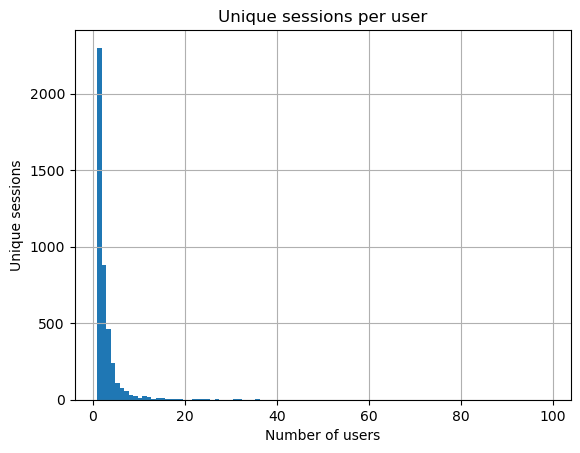

In [36]:
# chech distribution on a graph
mobile_df.groupby('user_id')['session_id'].nunique().hist(bins=100);

plt.xlabel('Number of users');
plt.ylabel('Unique sessions');
plt.title('Unique sessions per user');

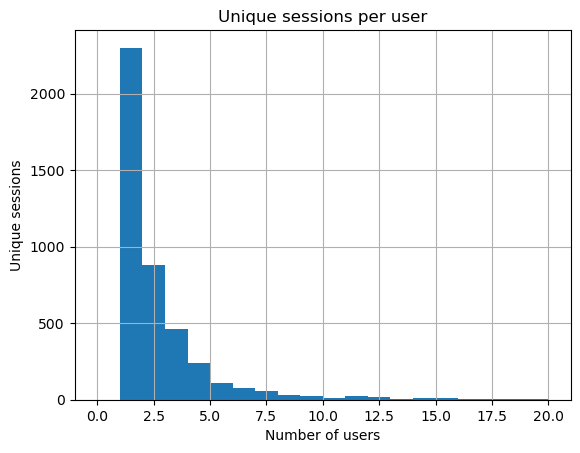

In [37]:
# now let's look at the shorter range: from 0 to 20
mobile_df.groupby('user_id')['session_id'].nunique().hist(bins=20, range=[0, 20]);

plt.xlabel('Number of users');
plt.ylabel('Unique sessions');
plt.title('Unique sessions per user');

* Average amount of sessions per user is 2.4 with median = 1, what is driven by runouts with high amount of sessions (max is 99) 
* The majority of users has 1 and 2 sessions
* 75% of users made up to 3 sessions

#### Sessions by days and weeks

Let's make `date` column by date days

In [38]:
# remove error `SettingWithCopyWarning`
pd.options.mode.chained_assignment = None

In [39]:
# separate column with date by days
mobile_df['date'] = mobile_df['event_time'].dt.date

In [40]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  
0 2019-10-07 13:39:45.989359           1  2019-10-07  
1 2019-10-07 13:40:31.052909           1  2019-10-07  
2 2019-10-07 13:41:05.722489           1  2019-10-07  
3 2019-10-07 13:43:20.735461           1  2019-10-07  
4 2019-10-07 13:45:30.917502           1  2019-10-07

Let's also add weekday and week number

In [41]:
# weekdays to a new column
mobile_df['weekday'] = mobile_df['event_time'].dt.dayofweek

In [42]:
# Check first and last weekdays of our study

print(
mobile_df['event_time'].min().weekday(),
mobile_df['event_time'].max().weekday()
    )

0 6


"0 - 6" stands for Monday to Sunday. So we can divide our study to 4 calendar weeks

In [43]:
# short func to week num assign
def week_num_set(cur_date):
    if cur_date >= dt.date(2019, 10, 7) and cur_date <= dt.date(2019, 10, 13):
        return 'week 1'
    elif cur_date >= dt.date(2019, 10, 14) and cur_date <= dt.date(2019, 10, 20):
        return 'week 2'
    elif cur_date >= dt.date(2019, 10, 21) and cur_date <= dt.date(2019, 10, 27):
        return 'week 3'
    elif cur_date >= dt.date(2019, 10, 28) and cur_date <= dt.date(2019, 11, 3):
        return 'week 4'
    else:
        return 'error! check again'

In [44]:
# apply func to date column
mobile_df['week'] = mobile_df['date'].apply(week_num_set)

In [45]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1  
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1  
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1  
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1  
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1

Now we build charts by **timeslices** (day / week / weekday)

In [46]:
# 1. for unique users group by day and user, after that count unique by each user
# 2. group by date / weekday / week. sum unique sessions and build a graph

for time in ['date', 'week', 'weekday']:

    fig = px.bar(mobile_df.groupby([time, 'user_id'])
                          .agg({'session_id': 'nunique'})
                          .reset_index()
                          .groupby(time)['session_id']
                          .sum())

    fig.update_layout(title='Session count by user',
                       xaxis_title=time,
                       yaxis_title='Sessions',
                       showlegend=False)

    fig.show()

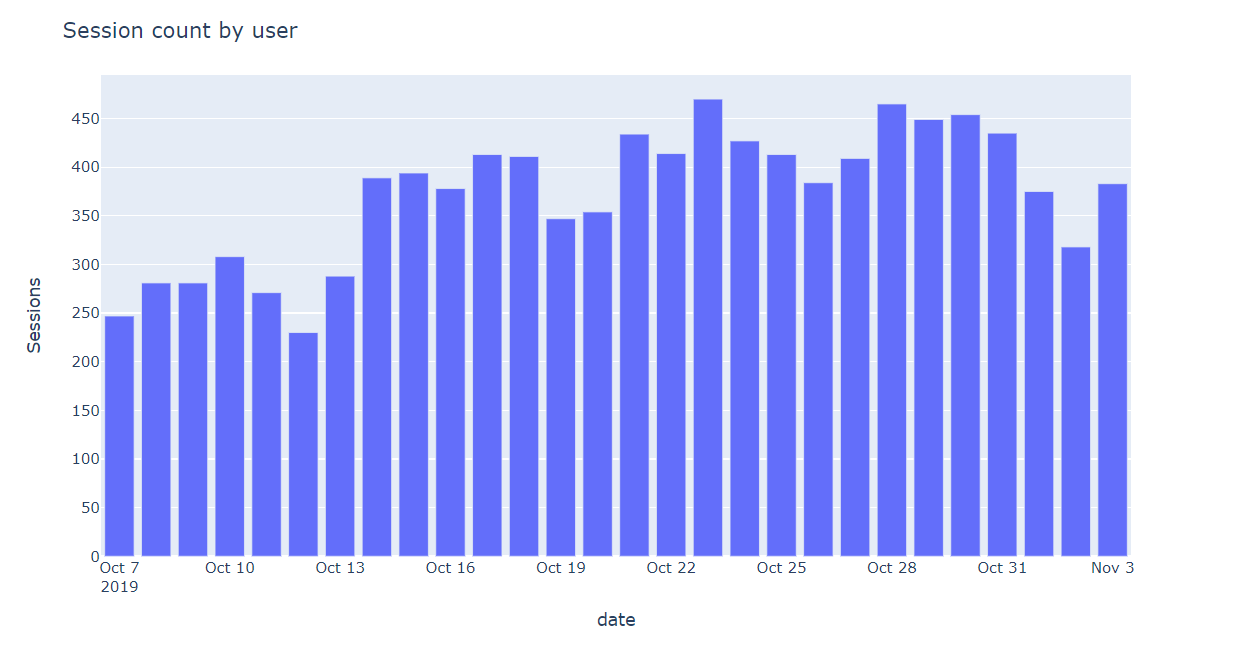
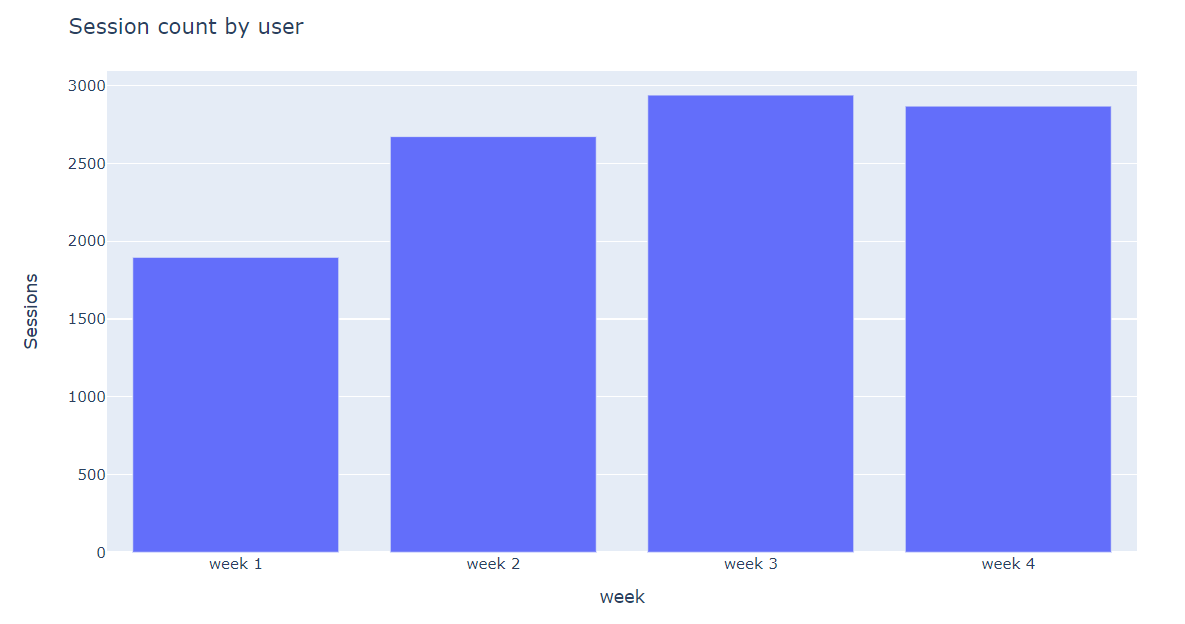
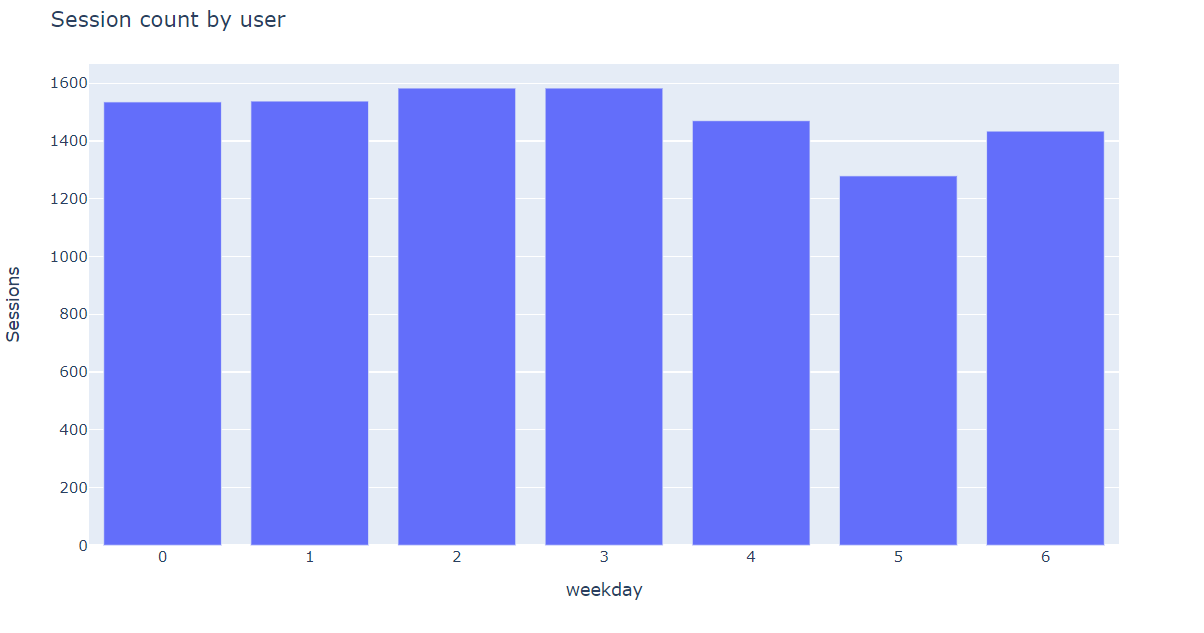

* From Monday to Thursday is the biggest user activity: 1535-1583 sessions
* On saturday is the lowest: 1279 sessions

Now let's look at the dynamics **by weeks**

Build a pivot table of users by session / week / weekday

In [47]:
# new var week_session, with pre-group by users with unique sessions
week_sessions = pd.pivot_table(mobile_df.groupby(['user_id', 
                                                  'week', 
                                                  'weekday']).agg({'session_id': 'nunique'}).reset_index(),\
                               index='weekday', 
                               columns='week', 
                               values='session_id', 
                               aggfunc='sum')

In [48]:
week_sessions

week     week 1  week 2  week 3  week 4
weekday                                
0           247     389     434     465
1           281     394     414     449
2           281     378     470     454
3           308     413     427     435
4           271     411     413     375
5           230     347     384     318
6           288     354     409     383

Check that all sessions in `week_session` and from above match

In [49]:
week_sessions.sum().sum()

10422

In [50]:
(mobile_df.groupby(['weekday', 'user_id'])
 .agg({'session_id': 'nunique'})
 .reset_index()
 .groupby('weekday')['session_id'].sum().sum()
)

10422

Good. Now build line chart of weeks by weekday

In [51]:
fig = px.line(week_sessions)

fig.update_layout(title='Session count by week and weekday',
                 xaxis_title='Weekday (0 = Monday)',
                 yaxis_title='Session count')

fig.show()

* First week is the least active
* 3-4 are the most active
* In general trends are similar: Mon-Thu are the most active, Saturday is the least

#### Users by source

In [52]:
# build in "plotly" pie chart by unique users and sources
fig = go.Figure(data=[go.Pie(
    labels=mobile_df.groupby('source')['user_id'].agg('nunique').index,
    values=mobile_df.groupby('source')['user_id'].agg('nunique')
)])


fig.update_layout(title='User distribution by source',
                 width=500)

fig.show()

* `Yandex` - is the most popular attraction source: 45% share
* `Google` share is 26%
* Rest of channels 29%

### Retention rate

Let's write the func to calculate Retention Rate (RR) and build graphs

#### Retention table

In [53]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1  
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1  
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1  
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1  
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1

Let's find first entry per each user

In [54]:
first_ts = mobile_df.groupby('user_id').agg({'event_time': 'first'})

In [55]:
first_ts.columns = ['first_ts']

In [56]:
first_ts.head()

first_ts
user_id                                                        
0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:45.989359
00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:33.849769
00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35.385028
004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:05.555052
00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41.263364

Now merge total table with session start of each user

In [57]:
mobile_df = mobile_df.merge(first_ts, on='user_id', how='left')

In [58]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  \
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1   
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1   
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1   
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1   
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1   

                    first_ts  
0 2019-10-07 13:39:45.989359  
1 2019-10-07 13:39:45.989359  
2 2019-10-07 13:39:45.989359  
3 2019-10-07 13:39:45.989359  
4 2019-10-07 13:39:45.989359

Now we calculate **lifetime**

In [59]:
mobile_df['lifetime'] = (mobile_df['event_time'] - mobile_df['first_ts']).dt.days

In [60]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  \
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1   
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1   
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1   
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1   
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1   

                    first_ts  lifetime  
0 2019-10-07 13:39:45.989359         0  
1 2019-10-07 13:39:45.989359         0  
2 2019-10-07 13:39:45.989359         0  
3 2019-10-07 13:39:45.989359         0  
4 2019-10-07 13:39:45.989359         0

Let's also make a `first_date` column with date of `first_ts` to build renetion table

In [61]:
mobile_df['first_date'] = mobile_df['first_ts'].dt.date

Now build retention table and look at user cohorts by days

In [62]:
mobile_grouped = pd.pivot_table(mobile_df, 
                               index=['first_date'],
                               columns='lifetime',
                               values='user_id',
                               aggfunc='nunique')

mobile_grouped

lifetime       0     1     2     3     4     5     6     7     8     9   ...  \
first_date                                                               ...   
2019-10-07  204.0  25.0  20.0  22.0  11.0   8.0  12.0  16.0  11.0  10.0  ...   
2019-10-08  167.0  27.0  21.0   9.0   7.0  11.0   9.0  12.0  10.0   7.0  ...   
2019-10-09  176.0  13.0  11.0  10.0  12.0  12.0  10.0  13.0  11.0   6.0  ...   
2019-10-10  174.0  16.0  18.0  14.0  17.0  14.0  12.0   9.0  14.0   6.0  ...   
2019-10-11  136.0  12.0  16.0  13.0  12.0  10.0  10.0   6.0   2.0   6.0  ...   
2019-10-12  125.0  16.0  20.0   7.0   8.0  11.0  10.0  11.0  10.0   8.0  ...   
2019-10-13  148.0  19.0  10.0   8.0  10.0   8.0   8.0   7.0   7.0   7.0  ...   
2019-10-14  185.0  21.0  19.0  19.0  15.0  13.0  10.0   8.0  14.0   7.0  ...   
2019-10-15  186.0  26.0  17.0  15.0  10.0  10.0  15.0  14.0  12.0   4.0  ...   
2019-10-16  166.0  21.0  12.0   5.0   8.0  10.0   7.0   9.0  10.0   7.0  ...   
2019-10-17  170.0  24.0  22.0  15.0  15.0  16.0  16.0   8.0   8.0   7.0  ...   
2019-10-18  156.0  13.0  15.0  15.0   9.0  10.0  10.0  12.0  11.0   5.0  ...   
2019-10-19  159.0  15.0  18.0  11.0   4.0   9.0  10.0  10.0   5.0   7.0  ...   
2019-10-20  144.0  15.0  11.0   7.0  10.0   9.0   6.0  10.0   8.0   4.0  ...   
2019-10-21  161.0  15.0  14.0  17.0   7.0   6.0   8.0  15.0   6.0   4.0  ...   
2019-10-22  157.0  18.0  13.0   8.0   6.0   9.0   9.0  11.0   9.0   8.0  ...   
2019-10-23  189.0  18.0  15.0  14.0  10.0  10.0   9.0  11.0   5.0   5.0  ...   
2019-10-24  162.0  17.0  12.0   8.0  10.0  10.0  11.0   5.0   7.0   8.0  ...   
2019-10-25  147.0  13.0  14.0  15.0  14.0   9.0  10.0  10.0   7.0   3.0  ...   
2019-10-26  139.0  21.0   9.0  10.0  12.0   8.0  10.0   4.0   5.0   NaN  ...   
2019-10-27  139.0  10.0  10.0  10.0  11.0  12.0   9.0   6.0   NaN   NaN  ...   
2019-10-28  158.0  15.0  15.0   9.0   9.0   2.0   4.0   NaN   NaN   NaN  ...   
2019-10-29  135.0  23.0  17.0  13.0   8.0   3.0   NaN   NaN   NaN   NaN  ...   
2019-10-30  134.0  19.0  10.0   8.0   3.0   NaN   NaN   NaN   NaN   NaN  ...   
2019-10-31  132.0  12.0   6.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2019-11-01  112.0  11.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2019-11-02   97.0  10.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2019-11-03  135.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

lifetime      17   18   19   20   21   22   23   24   25   26  
first_date                                                     
2019-10-07   4.0  9.0  5.0  3.0  4.0  7.0  7.0  8.0  9.0  6.0  
2019-10-08   5.0  3.0  8.0  6.0  3.0  4.0  7.0  5.0  4.0  2.0  
2019-10-09   3.0  2.0  5.0  2.0  6.0  2.0  1.0  4.0  3.0  NaN  
2019-10-10  11.0  6.0  5.0  3.0  7.0  3.0  2.0  2.0  NaN  NaN  
2019-10-11   8.0  4.0  3.0  3.0  4.0  4.0  2.0  NaN  NaN  NaN  
2019-10-12   5.0  5.0  3.0  3.0  8.0  4.0  NaN  NaN  NaN  NaN  
2019-10-13   2.0  3.0  2.0  5.0  1.0  NaN  NaN  NaN  NaN  NaN  
2019-10-14   7.0  4.0  3.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-15   6.0  5.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-16   2.0  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-17   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-18   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-19   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-20   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-21   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-22   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-23   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-24   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-25   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-26   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-27   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-28   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2019-10-29   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

Need to add cohort size

In [63]:
# calculation of cohort size

cohort_sizes = (
    mobile_df
    .groupby(['first_date'])
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id': 'cohort_size'})
)

cohort_sizes.head()

cohort_size
first_date             
2019-10-07          204
2019-10-08          167
2019-10-09          176
2019-10-10          174
2019-10-11          136

Now adding cohorts into `mobile_grouped`

In [64]:
# merging lifetimes to cohorts so that cohort would on the left. Filling NaNs with Zero
mobile_grouped = cohort_sizes.merge(mobile_grouped, 
                                    on='first_date', 
                                    how='left').fillna(0)

mobile_grouped

cohort_size      0     1     2     3     4     5     6     7  \
first_date                                                                 
2019-10-07          204  204.0  25.0  20.0  22.0  11.0   8.0  12.0  16.0   
2019-10-08          167  167.0  27.0  21.0   9.0   7.0  11.0   9.0  12.0   
2019-10-09          176  176.0  13.0  11.0  10.0  12.0  12.0  10.0  13.0   
2019-10-10          174  174.0  16.0  18.0  14.0  17.0  14.0  12.0   9.0   
2019-10-11          136  136.0  12.0  16.0  13.0  12.0  10.0  10.0   6.0   
2019-10-12          125  125.0  16.0  20.0   7.0   8.0  11.0  10.0  11.0   
2019-10-13          148  148.0  19.0  10.0   8.0  10.0   8.0   8.0   7.0   
2019-10-14          185  185.0  21.0  19.0  19.0  15.0  13.0  10.0   8.0   
2019-10-15          186  186.0  26.0  17.0  15.0  10.0  10.0  15.0  14.0   
2019-10-16          166  166.0  21.0  12.0   5.0   8.0  10.0   7.0   9.0   
2019-10-17          170  170.0  24.0  22.0  15.0  15.0  16.0  16.0   8.0   
2019-10-18          156  156.0  13.0  15.0  15.0   9.0  10.0  10.0  12.0   
2019-10-19          159  159.0  15.0  18.0  11.0   4.0   9.0  10.0  10.0   
2019-10-20          144  144.0  15.0  11.0   7.0  10.0   9.0   6.0  10.0   
2019-10-21          161  161.0  15.0  14.0  17.0   7.0   6.0   8.0  15.0   
2019-10-22          157  157.0  18.0  13.0   8.0   6.0   9.0   9.0  11.0   
2019-10-23          189  189.0  18.0  15.0  14.0  10.0  10.0   9.0  11.0   
2019-10-24          162  162.0  17.0  12.0   8.0  10.0  10.0  11.0   5.0   
2019-10-25          147  147.0  13.0  14.0  15.0  14.0   9.0  10.0  10.0   
2019-10-26          139  139.0  21.0   9.0  10.0  12.0   8.0  10.0   4.0   
2019-10-27          139  139.0  10.0  10.0  10.0  11.0  12.0   9.0   6.0   
2019-10-28          158  158.0  15.0  15.0   9.0   9.0   2.0   4.0   0.0   
2019-10-29          135  135.0  23.0  17.0  13.0   8.0   3.0   0.0   0.0   
2019-10-30          134  134.0  19.0  10.0   8.0   3.0   0.0   0.0   0.0   
2019-10-31          132  132.0  12.0   6.0   3.0   0.0   0.0   0.0   0.0   
2019-11-01          112  112.0  11.0   3.0   0.0   0.0   0.0   0.0   0.0   
2019-11-02           97   97.0  10.0   0.0   0.0   0.0   0.0   0.0   0.0   
2019-11-03          135  135.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

               8  ...    17   18   19   20   21   22   23   24   25   26  
first_date        ...                                                     
2019-10-07  11.0  ...   4.0  9.0  5.0  3.0  4.0  7.0  7.0  8.0  9.0  6.0  
2019-10-08  10.0  ...   5.0  3.0  8.0  6.0  3.0  4.0  7.0  5.0  4.0  2.0  
2019-10-09  11.0  ...   3.0  2.0  5.0  2.0  6.0  2.0  1.0  4.0  3.0  0.0  
2019-10-10  14.0  ...  11.0  6.0  5.0  3.0  7.0  3.0  2.0  2.0  0.0  0.0  
2019-10-11   2.0  ...   8.0  4.0  3.0  3.0  4.0  4.0  2.0  0.0  0.0  0.0  
2019-10-12  10.0  ...   5.0  5.0  3.0  3.0  8.0  4.0  0.0  0.0  0.0  0.0  
2019-10-13   7.0  ...   2.0  3.0  2.0  5.0  1.0  0.0  0.0  0.0  0.0  0.0  
2019-10-14  14.0  ...   7.0  4.0  3.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-15  12.0  ...   6.0  5.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-16  10.0  ...   2.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-17   8.0  ...   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-18  11.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-19   5.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-20   8.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-21   6.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-22   9.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-23   5.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-24   7.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-25   7.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-26   5.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-10-27   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2019-1

Now we divide **users by lifetime** on **cohort size** and calculate `Retention Rate`

In [65]:
# use "div" method and drop cohort column (no need)
mobile_grouped = mobile_grouped.div(
    mobile_grouped['cohort_size'], axis=0
).drop(columns=['cohort_size'])

mobile_grouped

0         1         2         3         4         5         6   \
first_date                                                                    
2019-10-07  1.0  0.122549  0.098039  0.107843  0.053922  0.039216  0.058824   
2019-10-08  1.0  0.161677  0.125749  0.053892  0.041916  0.065868  0.053892   
2019-10-09  1.0  0.073864  0.062500  0.056818  0.068182  0.068182  0.056818   
2019-10-10  1.0  0.091954  0.103448  0.080460  0.097701  0.080460  0.068966   
2019-10-11  1.0  0.088235  0.117647  0.095588  0.088235  0.073529  0.073529   
2019-10-12  1.0  0.128000  0.160000  0.056000  0.064000  0.088000  0.080000   
2019-10-13  1.0  0.128378  0.067568  0.054054  0.067568  0.054054  0.054054   
2019-10-14  1.0  0.113514  0.102703  0.102703  0.081081  0.070270  0.054054   
2019-10-15  1.0  0.139785  0.091398  0.080645  0.053763  0.053763  0.080645   
2019-10-16  1.0  0.126506  0.072289  0.030120  0.048193  0.060241  0.042169   
2019-10-17  1.0  0.141176  0.129412  0.088235  0.088235  0.094118  0.094118   
2019-10-18  1.0  0.083333  0.096154  0.096154  0.057692  0.064103  0.064103   
2019-10-19  1.0  0.094340  0.113208  0.069182  0.025157  0.056604  0.062893   
2019-10-20  1.0  0.104167  0.076389  0.048611  0.069444  0.062500  0.041667   
2019-10-21  1.0  0.093168  0.086957  0.105590  0.043478  0.037267  0.049689   
2019-10-22  1.0  0.114650  0.082803  0.050955  0.038217  0.057325  0.057325   
2019-10-23  1.0  0.095238  0.079365  0.074074  0.052910  0.052910  0.047619   
2019-10-24  1.0  0.104938  0.074074  0.049383  0.061728  0.061728  0.067901   
2019-10-25  1.0  0.088435  0.095238  0.102041  0.095238  0.061224  0.068027   
2019-10-26  1.0  0.151079  0.064748  0.071942  0.086331  0.057554  0.071942   
2019-10-27  1.0  0.071942  0.071942  0.071942  0.079137  0.086331  0.064748   
2019-10-28  1.0  0.094937  0.094937  0.056962  0.056962  0.012658  0.025316   
2019-10-29  1.0  0.170370  0.125926  0.096296  0.059259  0.022222  0.000000   
2019-10-30  1.0  0.141791  0.074627  0.059701  0.022388  0.000000  0.000000   
2019-10-31  1.0  0.090909  0.045455  0.022727  0.000000  0.000000  0.000000   
2019-11-01  1.0  0.098214  0.026786  0.000000  0.000000  0.000000  0.000000   
2019-11-02  1.0  0.103093  0.000000  0.000000  0.000000  0.000000  0.000000   
2019-11-03  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                  7         8         9   ...        17        18        19  \
first_date                                ...                                 
2019-10-07  0.078431  0.053922  0.049020  ...  0.019608  0.044118  0.024510   
2019-10-08  0.071856  0.059880  0.041916  ...  0.029940  0.017964  0.047904   
2019-10-09  0.073864  0.062500  0.034091  ...  0.017045  0.011364  0.028409   
2019-10-10  0.051724  0.080460  0.034483  ...  0.063218  0.034483  0.028736   
2019-10-11  0.044118  0.014706  0.044118  ...  0.058824  0.029412  0.022059   
2019-10-12  0.088000  0.080000  0.064000  ...  0.040000  0.040000  0.024000   
2019-10-13  0.047297  0.047297  0.047297  ...  0.013514  0.020270  0.013514   
2019-10-14  0.043243  0.075676  0.037838  ...  0.037838  0.021622  0.016216   
2019-10-15  0.075269  0.064516  0.021505  ...  0.032258  0.026882  0.016129   
2019-10-16  0.054217  0.060241  0.042169  ...  0.012048  0.006024  0.000000   
2019-10-17  0.047059  0.047059  0.041176  ...  0.005882  0.000000  0.000000   
2019-10-18  0.076923  0.070513  0.032051  ...  0.000000  0.000000  0.000000   
2019-10-19  0.062893  0.031447  0.044025  ...  0.000000  0.000000  0.000000   
2019-10-20  0.069444  0.055556  0.027778  ...  0.000000  0.000000  0.000000   
2019-10-21  0.093168  0.037267  0.024845  ...  0.000000  0.000000  0.000000   
2019-10-22  0.070064  0.057325  0.050955  ...  0.000000  0.000000  0.000000   
2019-10-23  0.058201  0.026455  0.026455  ...  0.000000  0.000000  0.000000   
2019-10-24  0.030864  0.043210  0.049383  ...  0.000000  0.000000  0.000000   
2019-10-25  0.068027  0.047619  0.020408  ...  0.000000  0.000

#### `get_retention`

Now let's put it all in one func and add some parameters into it:
* `observation_date` - frames of the observation
* `horizon_days` - until when we analyze
* `ignore_horizon` - choose if we ignore analysis horizon or not (by default: NO)

In [66]:
def get_retention(
    data, observation_date, horizon_days, ignore_horizon=False, dimensions=['first_date'], 
):
    
    # exclude users, who did not last until the analysis horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    data = data.query('first_date <= @last_suitable_acquisition_date')

    # collection all raw data to calculate the retention
    data['lifetime'] = (data['event_time'] - data['first_ts']).dt.days

    # calculation of retention
    result_grouped = data.pivot_table(index=dimensions, 
                                      columns='lifetime', 
                                      values='user_id', 
                                      aggfunc='nunique')
    
    if dimensions != []:
        cohort_sizes = (data.groupby(dimensions)
                            .agg({'user_id': 'nunique'})
                            .rename(columns={'user_id': 'cohort_size'}))

        result_grouped = cohort_sizes.merge(result_grouped, 
                                            on=dimensions, 
                                            how='left').fillna(0)
    else: 
        cohort_sizes = (pd.DataFrame({'user_id': mobile_df.agg({'user_id': 'nunique'})})
                        .rename(columns={'user_id': 'cohort_size'})
                       )


        result_grouped = cohort_sizes.join(result_grouped).fillna(0)

    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # exclude all lifetimes which exceed the analysis horizon
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # adding the column with cohort size
    result_grouped['cohort_size'] = cohort_sizes

    # returning retention table and raw data
    return data, result_grouped

In [67]:
# func check
retention_raw, retention = get_retention(mobile_df, 
                                         mobile_df['date'].max(), # last date as max of analysis
                                         27,                      # horizon (max)                   
                                         ignore_horizon=True)  

retention

cohort_size    0         1         2         3         4  \
first_date                                                             
2019-10-07          204  1.0  0.122549  0.098039  0.107843  0.053922   
2019-10-08          167  1.0  0.161677  0.125749  0.053892  0.041916   
2019-10-09          176  1.0  0.073864  0.062500  0.056818  0.068182   
2019-10-10          174  1.0  0.091954  0.103448  0.080460  0.097701   
2019-10-11          136  1.0  0.088235  0.117647  0.095588  0.088235   
2019-10-12          125  1.0  0.128000  0.160000  0.056000  0.064000   
2019-10-13          148  1.0  0.128378  0.067568  0.054054  0.067568   
2019-10-14          185  1.0  0.113514  0.102703  0.102703  0.081081   
2019-10-15          186  1.0  0.139785  0.091398  0.080645  0.053763   
2019-10-16          166  1.0  0.126506  0.072289  0.030120  0.048193   
2019-10-17          170  1.0  0.141176  0.129412  0.088235  0.088235   
2019-10-18          156  1.0  0.083333  0.096154  0.096154  0.057692   
2019-10-19          159  1.0  0.094340  0.113208  0.069182  0.025157   
2019-10-20          144  1.0  0.104167  0.076389  0.048611  0.069444   
2019-10-21          161  1.0  0.093168  0.086957  0.105590  0.043478   
2019-10-22          157  1.0  0.114650  0.082803  0.050955  0.038217   
2019-10-23          189  1.0  0.095238  0.079365  0.074074  0.052910   
2019-10-24          162  1.0  0.104938  0.074074  0.049383  0.061728   
2019-10-25          147  1.0  0.088435  0.095238  0.102041  0.095238   
2019-10-26          139  1.0  0.151079  0.064748  0.071942  0.086331   
2019-10-27          139  1.0  0.071942  0.071942  0.071942  0.079137   
2019-10-28          158  1.0  0.094937  0.094937  0.056962  0.056962   
2019-10-29          135  1.0  0.170370  0.125926  0.096296  0.059259   
2019-10-30          134  1.0  0.141791  0.074627  0.059701  0.022388   
2019-10-31          132  1.0  0.090909  0.045455  0.022727  0.000000   
2019-11-01          112  1.0  0.098214  0.026786  0.000000  0.000000   
2019-11-02           97  1.0  0.103093  0.000000  0.000000  0.000000   
2019-11-03          135  1.0  0.000000  0.000000  0.000000  0.000000   

                   5         6         7         8  ...        17        18  \
first_date                                          ...                       
2019-10-07  0.039216  0.058824  0.078431  0.053922  ...  0.019608  0.044118   
2019-10-08  0.065868  0.053892  0.071856  0.059880  ...  0.029940  0.017964   
2019-10-09  0.068182  0.056818  0.073864  0.062500  ...  0.017045  0.011364   
2019-10-10  0.080460  0.068966  0.051724  0.080460  ...  0.063218  0.034483   
2019-10-11  0.073529  0.073529  0.044118  0.014706  ...  0.058824  0.029412   
2019-10-12  0.088000  0.080000  0.088000  0.080000  ...  0.040000  0.040000   
2019-10-13  0.054054  0.054054  0.047297  0.047297  ...  0.013514  0.020270   
2019-10-14  0.070270  0.054054  0.043243  0.075676  ...  0.037838  0.021622   
2019-10-15  0.053763  0.080645  0.075269  0.064516  ...  0.032258  0.026882   
2019-10-16  0.060241  0.042169  0.054217  0.060241  ...  0.012048  0.006024   
2019-10-17  0.094118  0.094118  0.047059  0.047059  ...  0.005882  0.000000   
2019-10-18  0.064103  0.064103  0.076923  0.070513  ...  0.000000  0.000000   
2019-10-19  0.056604  0.062893  0.062893  0.031447  ...  0.000000  0.000000   
2019-10-20  0.062500  0.041667  0.069444  0.055556  ...  0.000000  0.000000   
2019-10-21  0.037267  0.049689  0.093168  0.037267  ...  0.000000  0.000000   
2019-10-22  0.057325  0.057325  0.070064  0.057325  ...  0.000000  0.000000   
2019-10-23  0.052910  0.047619  0.058201  0.026455  ...  0.000000  0.000000   
2019-10-24  0.061728  0.067901  0.030864  0.043210  ...  0.000000  0.000000   
2019-10-25  0.061224  0.068027  0.068027  0.047619  ...  0.000000  0.000000   
2019-10-26  0.057554  0.071942  0.028777  0.035971  ...  0.000000  0.000000   
2019-10-27  0.086331  0.064748  0.043165  0.000000  ...  0.000000  0.000000   
2019-10-28  0.012658  0.025316  0.

In [68]:
retention_raw.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  \
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1   
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1   
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1   
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1   
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1   

                    first_ts  lifetime  first_date  
0 2019-10-07 13:39:45.989359         0  2019-10-07  
1 2019-10-07 13:39:45.989359         0  2019-10-07  
2 2019-10-07 13:39:45.989359         0  2019-10-07  
3 2019-10-07 13:39:45.989359         0  2019-10-07  
4 2019-10-07 13:39:45.989359         0  2019-10-07

Good, now to vizualization

#### Heatmap

##### `retention_heatmap`

User data is for almost 28 days

* Let's build a heatmap by all days
* With 7 days horizon
* With 14 days horizon

In [69]:
# let's set `max_date` into a separate var
max_date = mobile_df['date'].max()

In [70]:
# now call `get_retention`
retention_raw, retention = get_retention(mobile_df, 
                                         max_date, 
                                         total_days,                 # all days (27, var is set in 5.1.1)
                                         ignore_horizon=True,        # looking at all users 
                                         dimensions=['first_date']
                                         )

In [71]:
# fuch to build retention heatmap

def retention_heatmap(retention, ylabel='Cohort Date', title='Retention heatmap'):
    plt.figure(figsize=(15, 6))  # chart size

    sns.heatmap(retention.drop(columns=['cohort_size', 0]), # droping columns with cohort size and 1st day retention (100%)
                annot=True,  # adding annotations
                fmt='.1%',  # converting values to %
                )

    plt.title(title)
    plt.xlabel('Lifetime')
    plt.ylabel(ylabel)
    plt.show()

##### Total retention

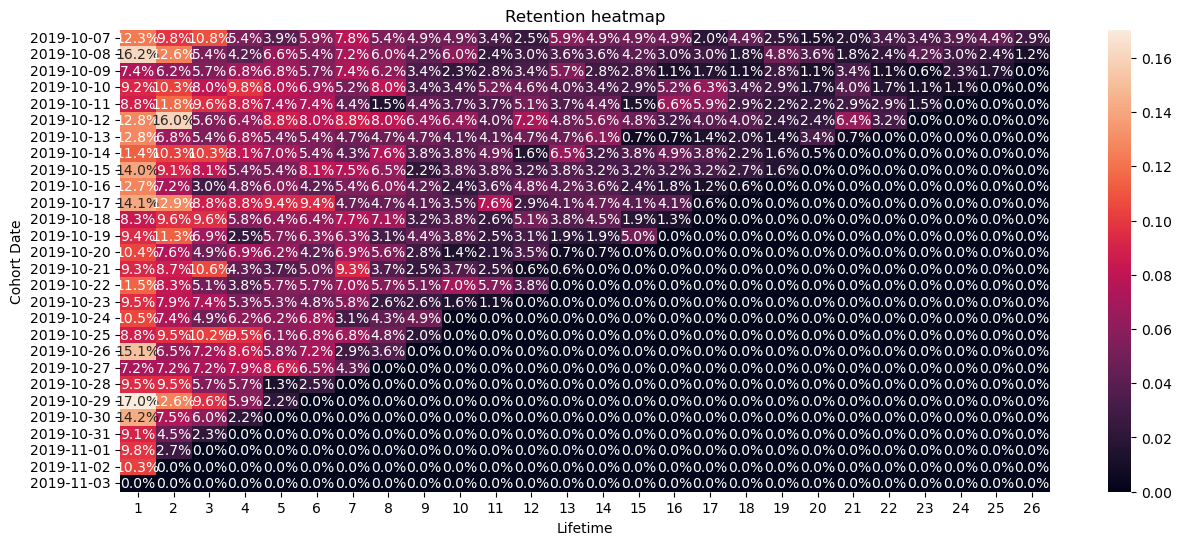

In [72]:
retention_heatmap(retention)

* The highest 1st day retention was at 2019-10-29
* Usually most of the users are retained at the first week

Now let's look with 7 and 7 days horizons

##### 7 days Horizon

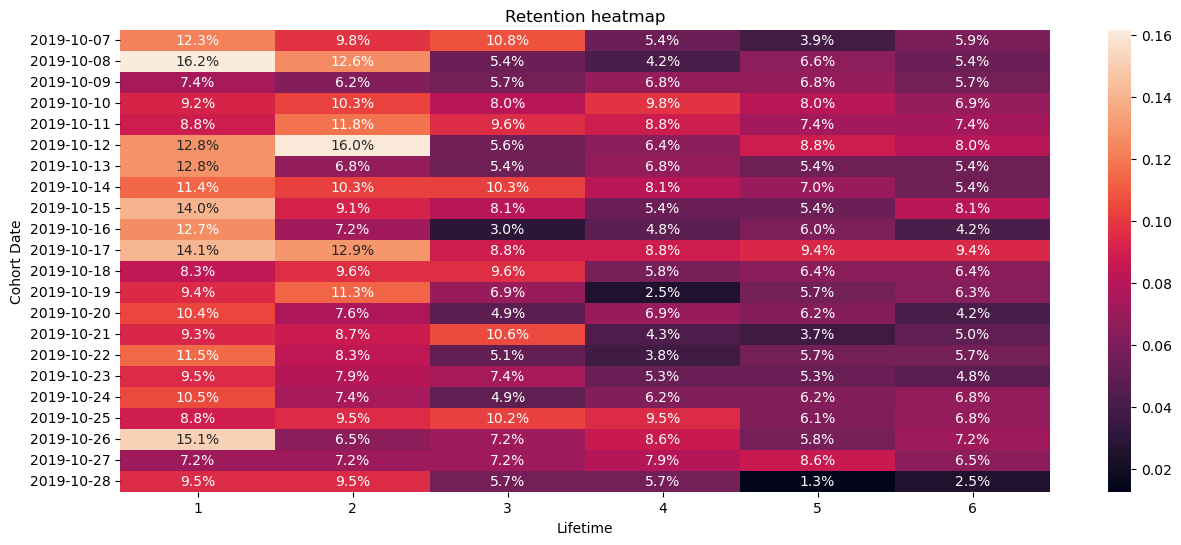

In [73]:
# 7 days horizon and not ignoring it

retention_raw, retention = get_retention(mobile_df, 
                                         observation_date = max_date, 
                                         horizon_days=7,                 
                                         ignore_horizon=False)

retention_heatmap(retention)

* Retention is not higher of 16.2%
* The biggest amount of users come back in first 3-4 days
* 17-Oct cohort shows the highest 7th day retention = 9.4%
* 28-Oct cohort shows the lowest = 2.5%

##### 14 days Horizon

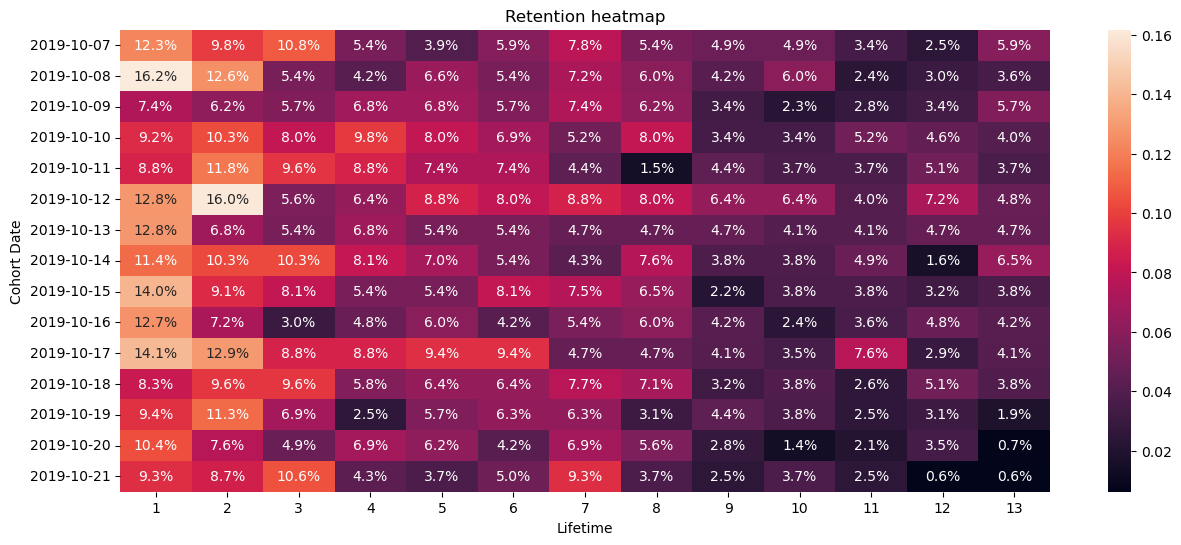

In [74]:
# 7 days horizon and not ignoring it

retention_raw, retention = get_retention(mobile_df, 
                                         max_date, 
                                         14,                 
                                         ignore_horizon=False)

retention_heatmap(retention)

* On the second week retention is decreasing
* But some of the cohorts show retention of 14th day = 6%
* In the last 3 days of the lifetimes, cohorts from 19-21 Oct are the weakest: retention is 0.6% - 1.9%. While in all the other days retention is at the range of 3.6% - 6.5%

### Session duration

First we need to calculate each session duration

As we don't session end time, let's calculate the duration as the difference between the first and the last action

In [75]:
# time diff between first and last action of each user session
session_duration = (mobile_df.groupby(['user_id', 'session_id'])['event_time']
                             .agg(['first', 'last'])
                             .diff(axis=1).drop(columns='first')
                   )

# column duration rename
session_duration = session_duration.reset_index().rename(columns={'last': 'duration'})

# converting session duration from sec to min
session_duration['duration'] = session_duration['duration'].dt.total_seconds() / 60

session_duration.head()

user_id  session_id   duration
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1   9.928788
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           2   8.456433
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3  14.987868
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           4  12.636196
4  00157779-810c-4498-9e05-a1e9e3cedf93           1  25.346455

Grouping users to calculate average session duration

In [76]:
# new var with avg session duration by user
avg_session = (session_duration.groupby('user_id')
                                 .agg({'duration': 'mean'})['duration']
                ).sort_values().reset_index()

In [77]:
# description show
avg_session.describe()

duration
count  4293.000000
mean     14.258788
std      15.726131
min       0.000000
25%       3.978396
50%       9.376117
75%      19.155104
max     161.014863

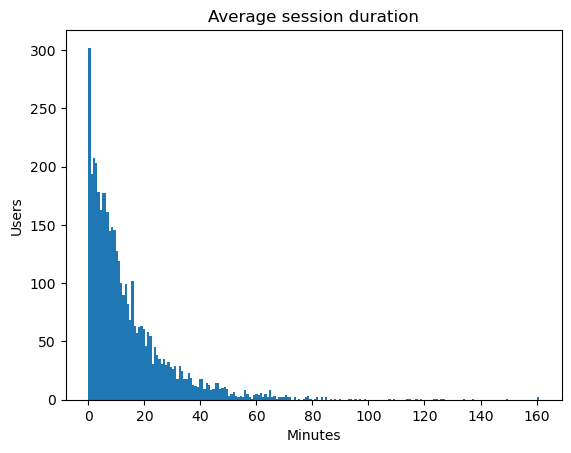

In [78]:
# hist
avg_session.plot(kind='hist', bins=200, legend=False);

plt.title('Average session duration');
plt.xlabel('Minutes');
plt.ylabel('Users');

Let's check the amount of zero-time sessions

In [79]:
avg_session.query('duration == 0').count()

user_id     83
duration    83
dtype: int64

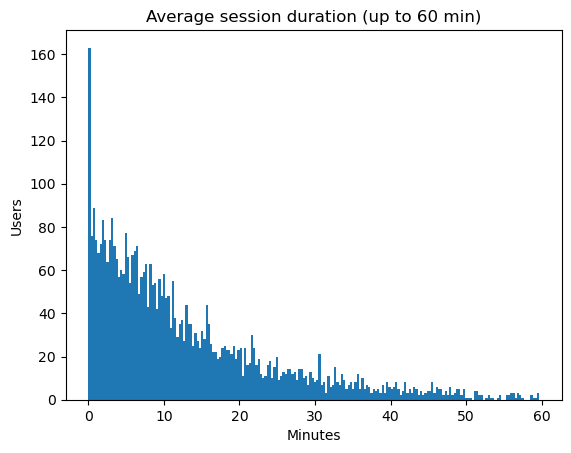

In [80]:
# closer look up to 60 min
avg_session.query('duration < 60').plot(kind='hist', bins=200, legend=False);

plt.title('Average session duration (up to 60 min)');
plt.xlabel('Minutes');
plt.ylabel('Users');

**Conclusion:**
* The biggesrt amount of users with zero session duration. This might be caused by accidental or quick open
* Average session duration is **14 min**
* Most of the session is in range 0-40 min
* There are anomalies with duration up to 160 mins (might be doomscrolling, hardworking, app bot or mistake)

### Action frequency

Let's build action frequency for the whole period

In [81]:
# grouping by actions, applying count and building hist through plotly
fig = px.bar(mobile_df.groupby('event_name')['event_time'].agg('count').sort_values(ascending=False))

fig.update_layout(title='Action frequency by types',
                   xaxis_title='Action type',
                   yaxis_title='Frequency',
                   showlegend=False,
                   width=800)

fig.show()

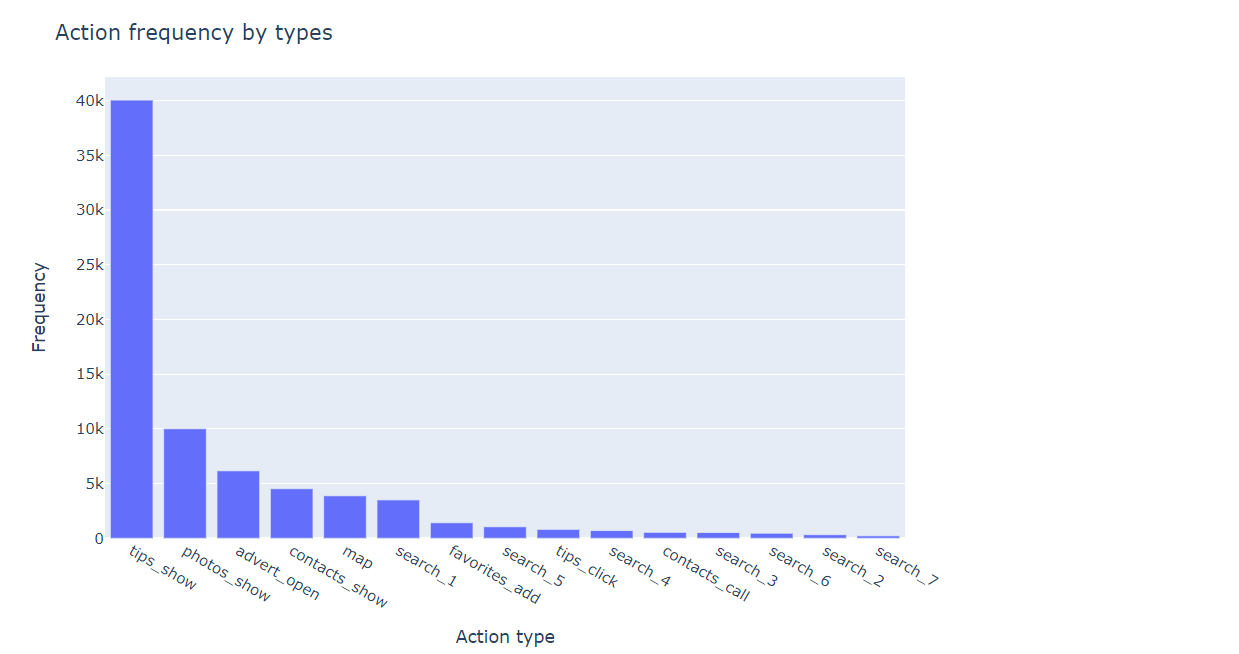

* Most of shows are `tips_show` - recommended ads. Most likely each user sees it on the enrty
* After that `photos_show` - maybe, you can see the photo without opening an ad
* Then `advert_open` and `contacts_show`
* Users also check the map, but calling really seldom

Let's check frequency distribution by days

In [82]:
# building cycle graphs for date, week, weekday

for time in ['date', 'week', 'weekday']:

    fig = px.bar(mobile_df.groupby(time)['event_time'].agg('count'))

    fig.update_layout(title='Action frequency for the period: {}'.format(time),
                       xaxis_title=time,
                       yaxis_title='Frequency',
                       showlegend=False,
                       width=700)

    fig.show()

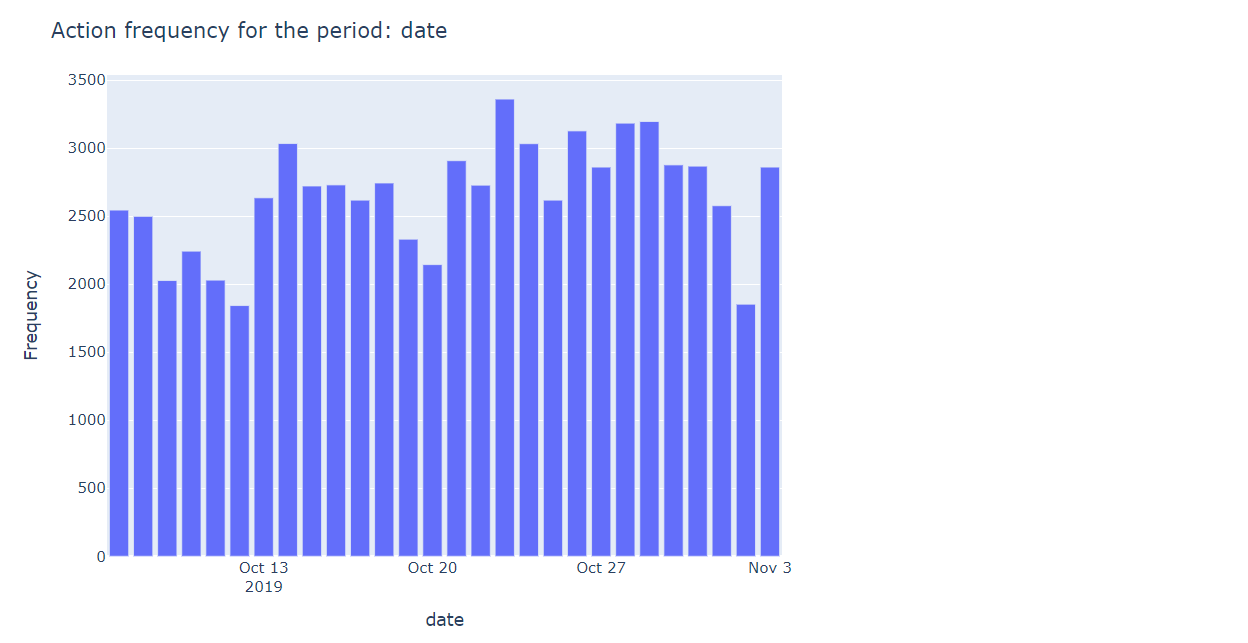
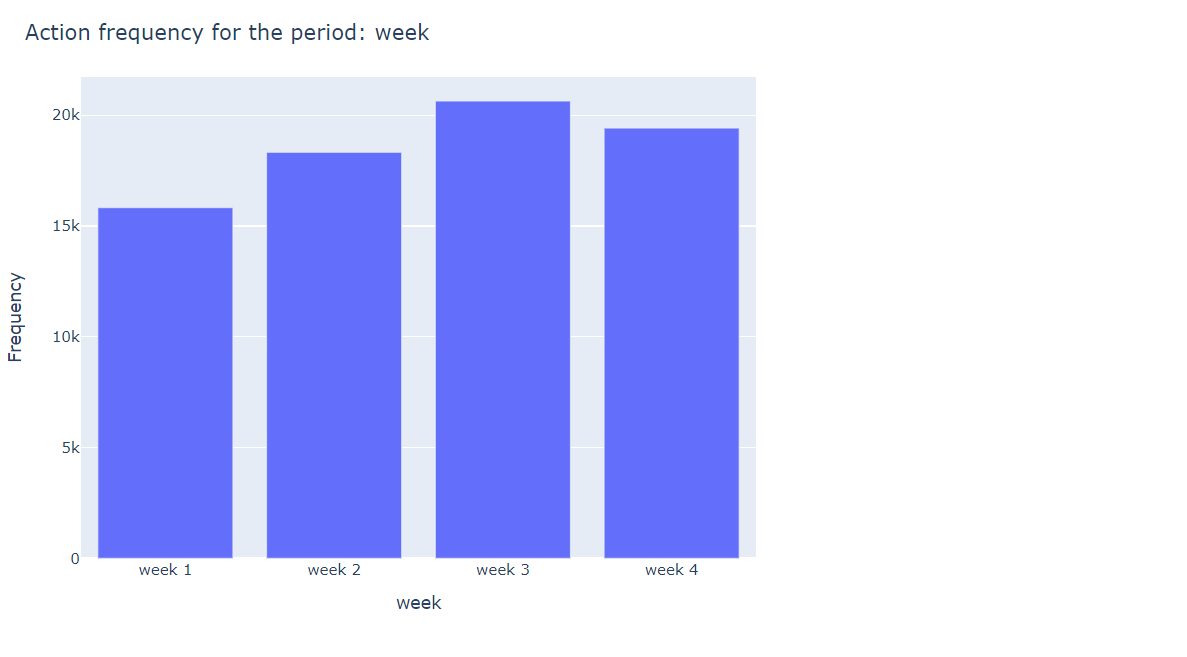
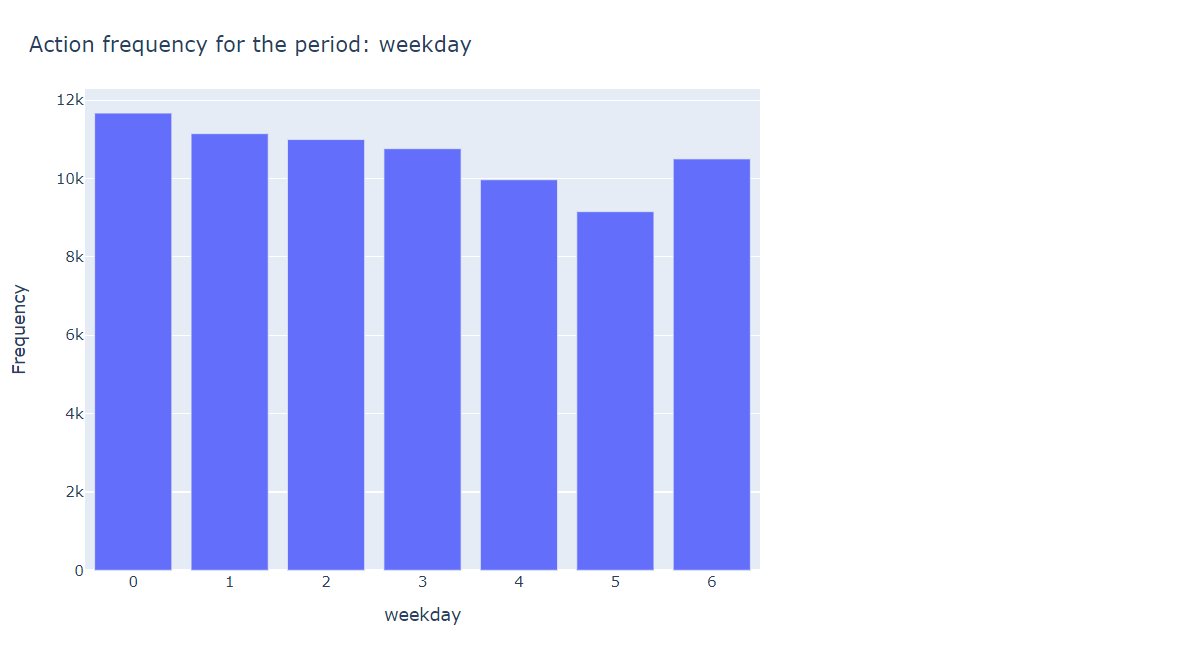

* The highest amount of actions were on the 1st week: 15.8k
* Users made the highest amount of actions on the 3rt week: 20.6k, which is ~25% more vs 1st week
* Users are most active on Monday and least active on Saturday

### Conversion to action

To calculate Conversion to action we need:
* number of unique users in each group
* number of unique users who made at least target action: `contacts_show` (not call, as people may call later)
* divide 2nd to 1st

Let's write a func so that we could calculate it for different time intervals

#### `get_conversion`

In [83]:
""" 
df - dataset on entry, dim - dimension

Groupin unique users by "dim" with target action  
and dividing by total number of unique users

Conversion is multiplied by 100 (in %) и renamed to 'cr %'
"""

def get_conversion(df, dim):
    return ((df.query('event_name == "contacts_show"')
              .groupby(dim)
              .agg({'user_id': 'nunique'}) 
            / 
            df.groupby(dim)
              .agg({'user_id': 'nunique'}) * 100)
              .rename(columns={'user_id': 'cr %'})
           )

#### `plot_conversion`

In [84]:
def plot_conversion(conversion, xaxis='Time interval'):
    # calculated "conversion" from "get_conversion" sent to plot   
    fig = px.bar(conversion)

    fig.update_layout(title='Conversion for the period, %',
                       xaxis_title=xaxis,
                       yaxis_title='Conversion, %',
                       showlegend=False,
                       width=700)

    fig.show()

#### By days

In [85]:
conversion = get_conversion(mobile_df, 'date')
plot_conversion(conversion, 'Day')

#### By week and weekday

Conversion by week

In [86]:
conversion = get_conversion(mobile_df, 'week')
plot_conversion(conversion, 'Week')

* During 4 weeks conversion is growing from 19.3% to 21%

In [87]:
conversion = get_conversion(mobile_df, 'weekday')
plot_conversion(conversion, 'Weekday (0 = Monday)')

* Highest conversion to target action on Fridays 21.4%
* Lowest on Mondays 17.5%

### Conclusion

* Analyzed period is **28 days** (4 full weeks from Monday to Sunday)
* The amount of session increased from 1900 on the 1st week up to 2900 on average on 3-4 weeks
* Top useractivity is from Monday to Thursday: 1535-1583 sessions. On Sarutday is the lowest: 1279
* By sources 45% users came from Yandex, 26% from Google and 29% from other sources
* Depending on the cohort, next day Retention rateis from 7 to 17%
* 7th day Retention is in range 2.5% - 9.4%, 14th day Retention: 0.6% - 6.5%
* Avg time in app is 14 min, 75% of all sessions are under 20 min. Most frequent duration is close-due-zero, potentially due to one-time opening (maybe accidential or quick check)
* Most frequent action is `tips_show`. Maybe each user sees recommended tips upon entry . Then goes `photos_show`(second popular, so it might be possible to see photos without entering the ad). After goes `advert_open` and `contacts_show`
* Conversion by days during the whole period (28 days) is stable: from 14.8% to 22.4%, it grew during 4weeks from 19.3% to 21%. Among weekdays the highest was on Friday 21.4%, the lowest on Monday 17.5%

## Behavioral analysis in groups

Based on the explaroratory analysis it is suggest to divide users by **first session duration**

This will let us understand how user liked and understood the app first time: if he was interested in it, found it easy to use and then to come back and buy/sell something

Upon results we'll check if there is an impact of average duration on conversion and retention

### Segmentation into groups

In [88]:
# new var with first session duration of each user
first_session = session_duration.query('session_id == 1').drop(columns='session_id')

# distribution check
first_session.describe()

duration
count  4293.000000
mean     15.014403
std      18.968061
min       0.000000
25%       2.637111
50%       8.868049
75%      20.610681
max     259.478410

Let's divide users into 4 groups by session duration:
* ultra-short: up to 2 min
* short: 2-10 min
* average: 10-30 min
* long: from 30 min

In [89]:
# def which checks duration vs threshold and assigns names
def duration_group(duration, thresholds):
    labels = [f'{i}-{j}' if j != float('inf') else f'{i}+' for i, j in zip([0] + thresholds, thresholds + [float('inf')])]

    for i, threshold in enumerate(thresholds):
        if duration <= threshold:
            return labels[i]
    
    return labels[-1]  # For durations greater than the last threshold

# here our thresholds in minutes
periods = [2, 10, 30]

first_session['group'] = first_session['duration'].apply(duration_group, thresholds=periods)

In [90]:
first_session.groupby('group')['user_id'].nunique()

group
0-2       936
10-30    1350
2-10     1360
30+       647
Name: user_id, dtype: int64

In [91]:
first_session.head()

user_id   duration  group
0   0001b1d5-b74a-4cbf-aeb0-7df5947bf349   9.928788   2-10
4   00157779-810c-4498-9e05-a1e9e3cedf93  25.346455  10-30
10  00463033-5717-4bf1-91b4-09183923b9df  24.707917  10-30
11  004690c3-5a84-4bb7-a8af-e0c8f8fca64e   3.586077   2-10
17  00551e79-152e-4441-9cf7-565d7eb04090   0.058725    0-2

In [118]:
fig = px.bar(first_session.groupby('group').agg({'duration': 'count'}))

fig.update_layout(title='User count by 1st session duration',
                   xaxis_title='1st session duration, min',
                   yaxis_title='User count',
                   showlegend=False,
                   width=500, height=400) 

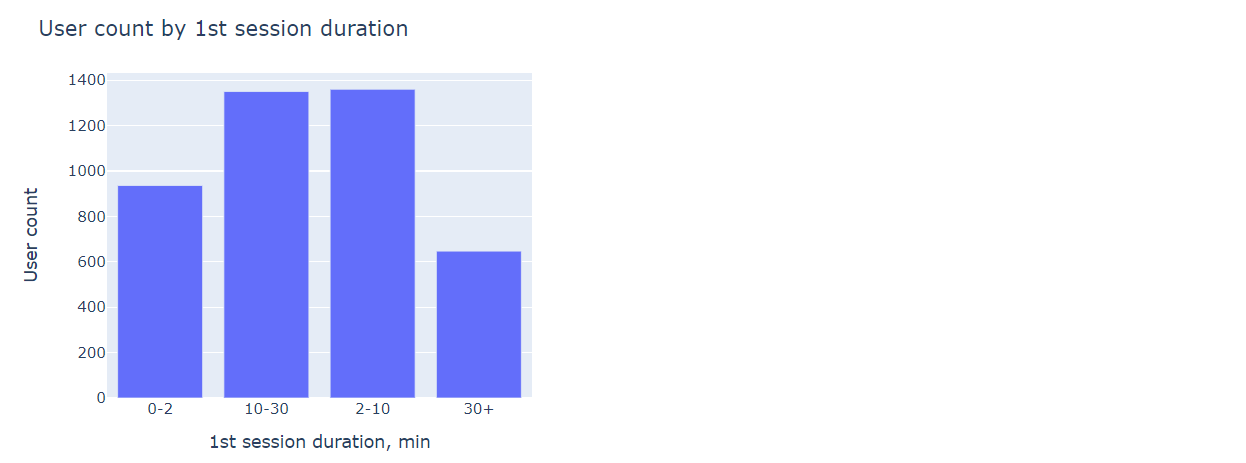

* We got 4 big group properly ditributed (without super-large or super-small)

Let's add 1st session indicators into `mobile_df`

In [93]:
mobile_df = mobile_df.merge(first_session[['user_id', 'group']], on='user_id')

In [94]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  \
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1   
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1   
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1   
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1   
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1   

                    first_ts  lifetime  first_date group  
0 2019-10-07 13:39:45.989359         0  2019-10-07  2-10  
1 2019-10-07 13:39:45.989359         0  2019-10-07  2-10  
2 2019-10-07 13:39:45.989359         0  2019-10-07  2-10  
3 2019-10-07 13:39:45.989359         0  2019-10-07  2-10  
4 2019-10-07 13:39:45.989359         0  2019-10-07  2-10

### `Retention rate` in groups

Now we build heatmaps and retention by 1st-session-duration groups

#### Total retention by groups

**7 days**

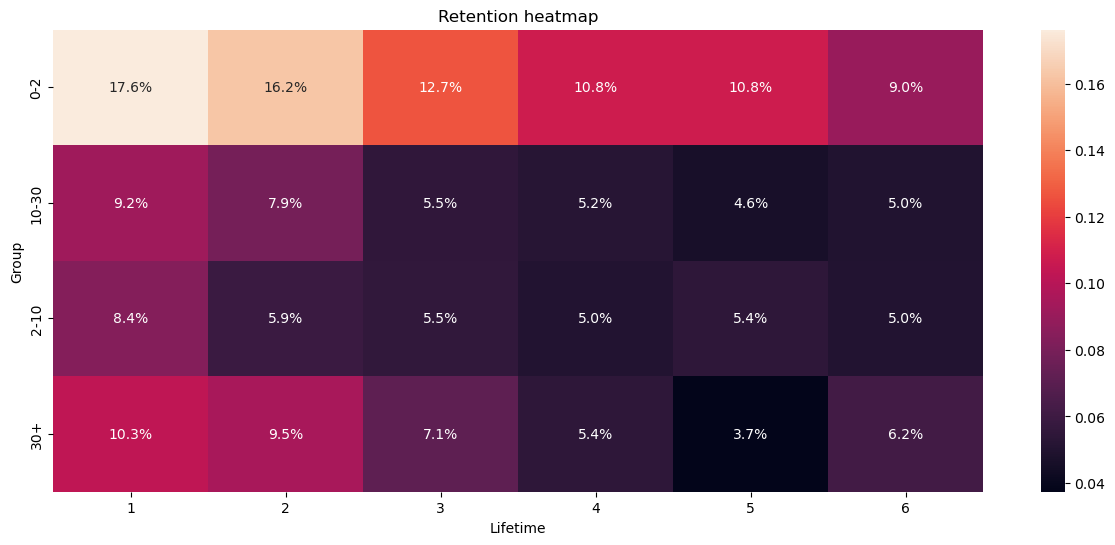

In [95]:
retention_raw, retention = get_retention(mobile_df, 
                                             max_date,               # last day of data
                                             7,                      # interval                 
                                             ignore_horizon=False,
                                             dimensions=['group'])   

# show heatmap
retention_heatmap(retention, ylabel='Group')

* Users with the shortes 1st session have the biggest 7 day retention = 9.0%
* Then goes 30+ min = 6.2%
* In groups 2-10 and 10-30 retention = 5.0%

**14 days**

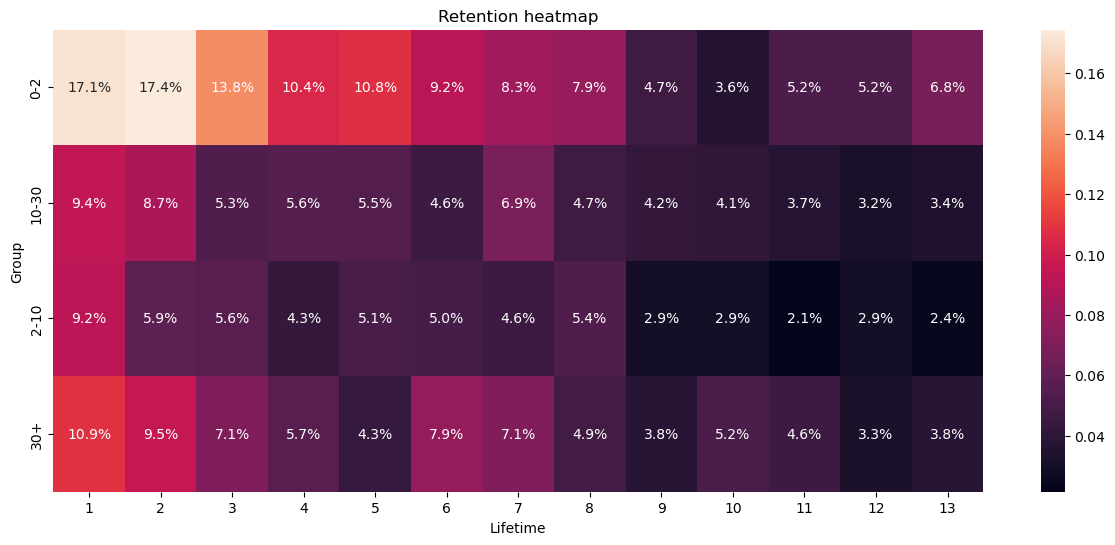

In [96]:
retention_raw, retention = get_retention(mobile_df, 
                                             max_date,               # last day of data
                                             14,                     # interval in days                  
                                             ignore_horizon=False,
                                             dimensions=['group'])   # split by groups

# show heatmap
retention_heatmap(retention, ylabel='Group')

* 14th Day retention is still the highest is groups `0-2` and `30+`: 6.8% and 3.8% respectively
* But retention of `10-30` group decreases faster than in `2-10`: 3.4% vs 2.4%

#### 7th Day retention by groups

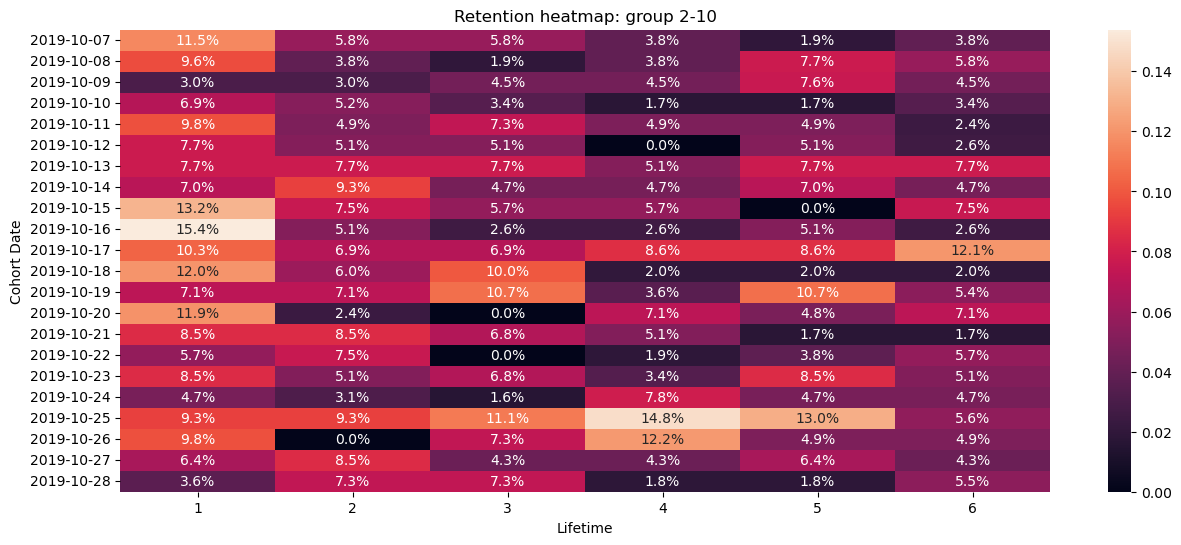

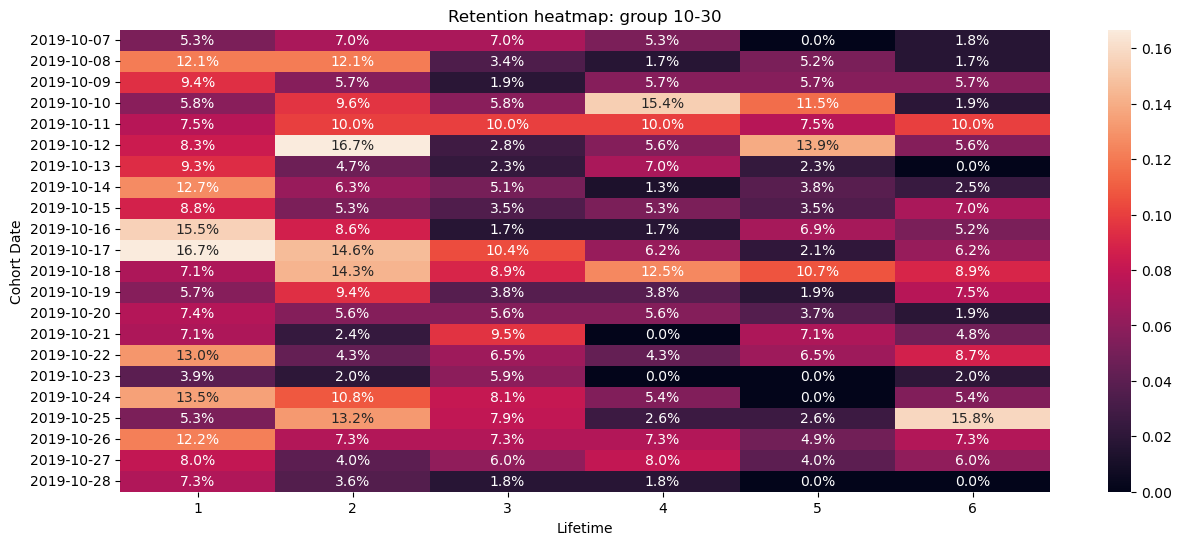

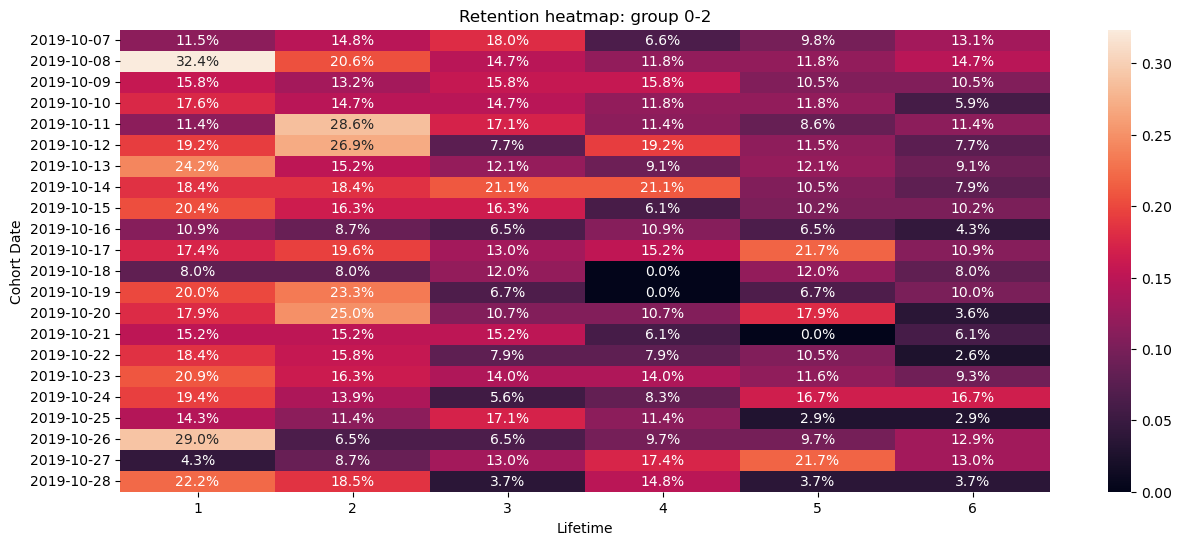

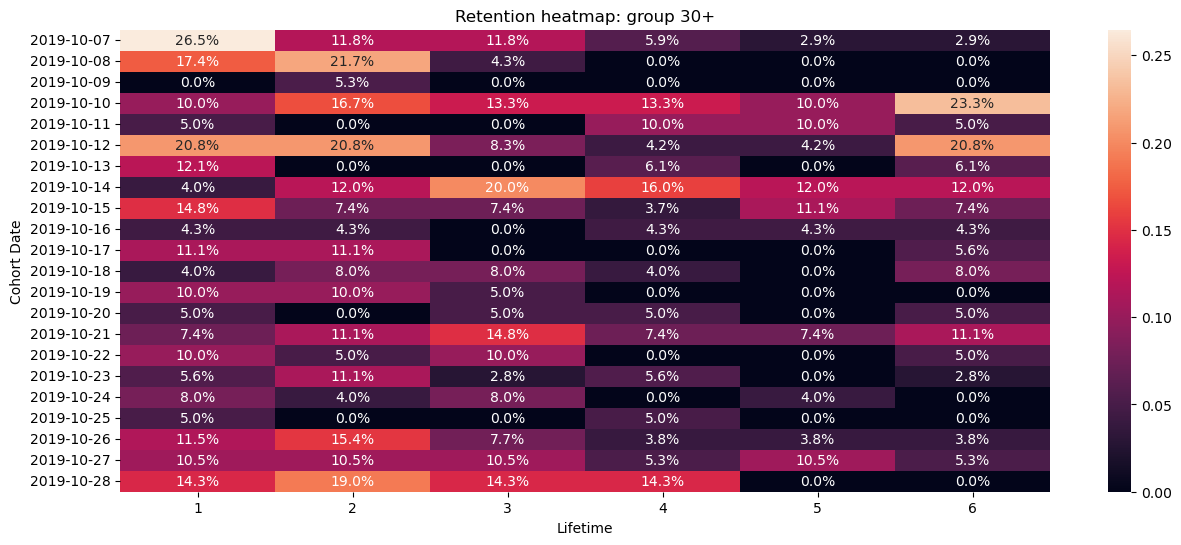

In [97]:
for group in mobile_df['group'].unique():
    
    # retention calculation
    retention_raw, retention = get_retention(mobile_df.query('group == @group'), 
                                             max_date,               # last day
                                             7,                      # interval                  
                                             ignore_horizon=False)   
    
    # retention heatmap show
    retention_heatmap(retention, title=('Retention heatmap: group {}'.format(group)))

#### 14 Days Retention

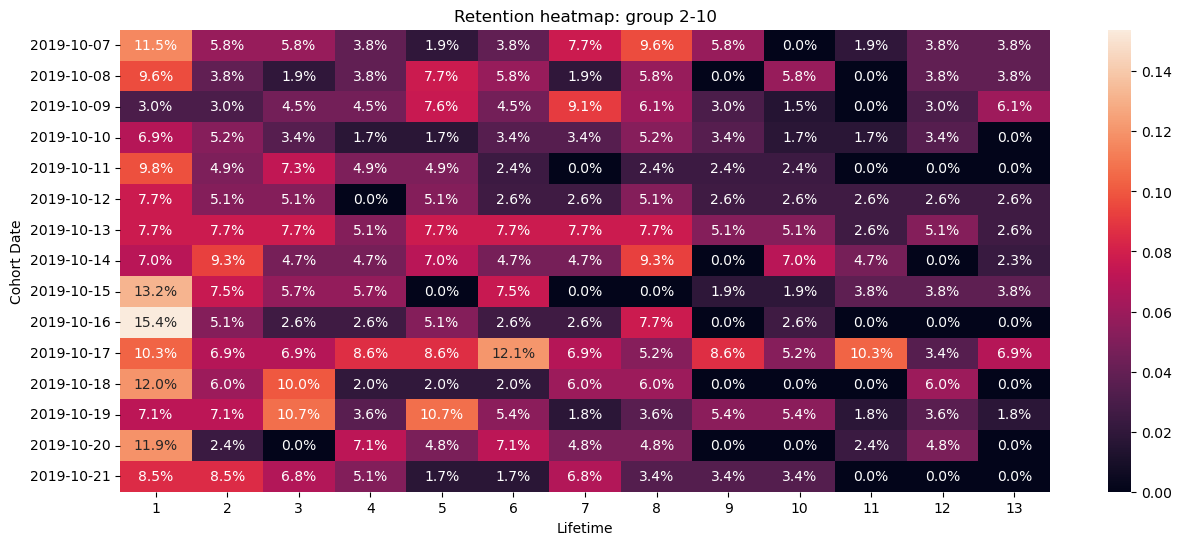

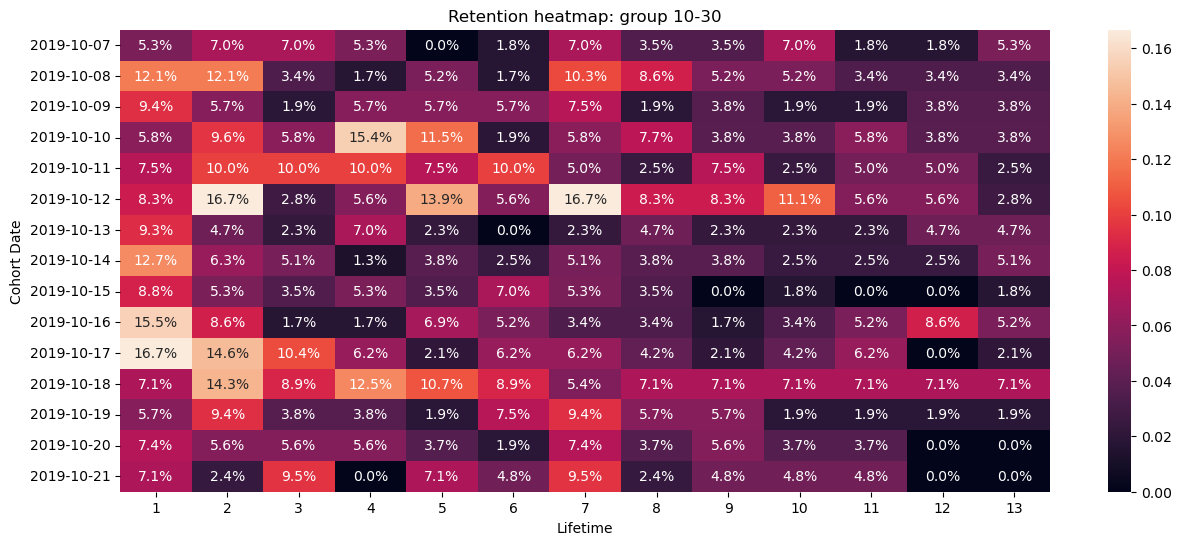

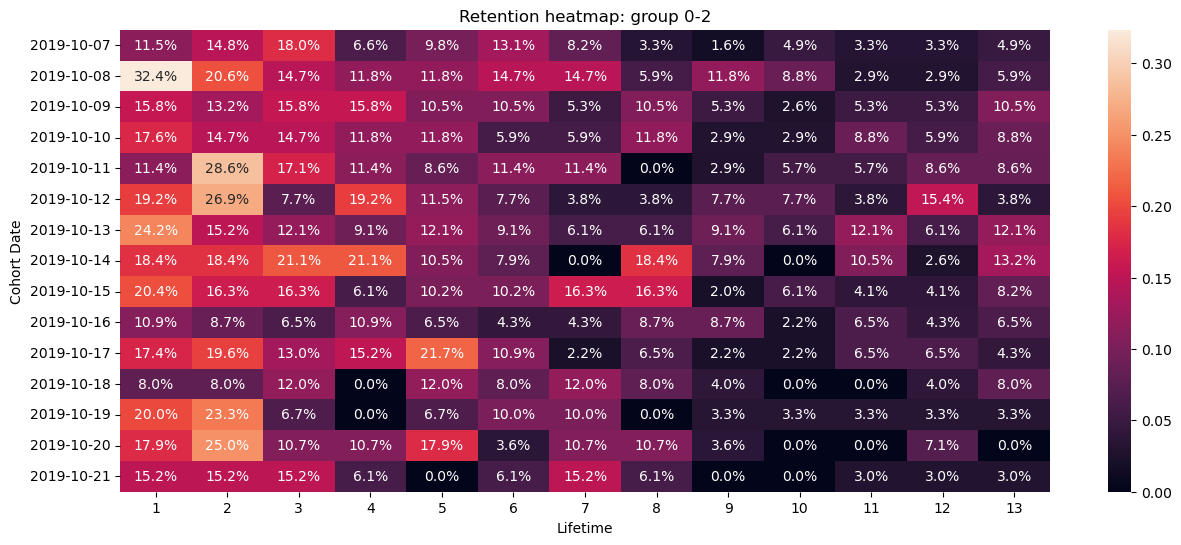

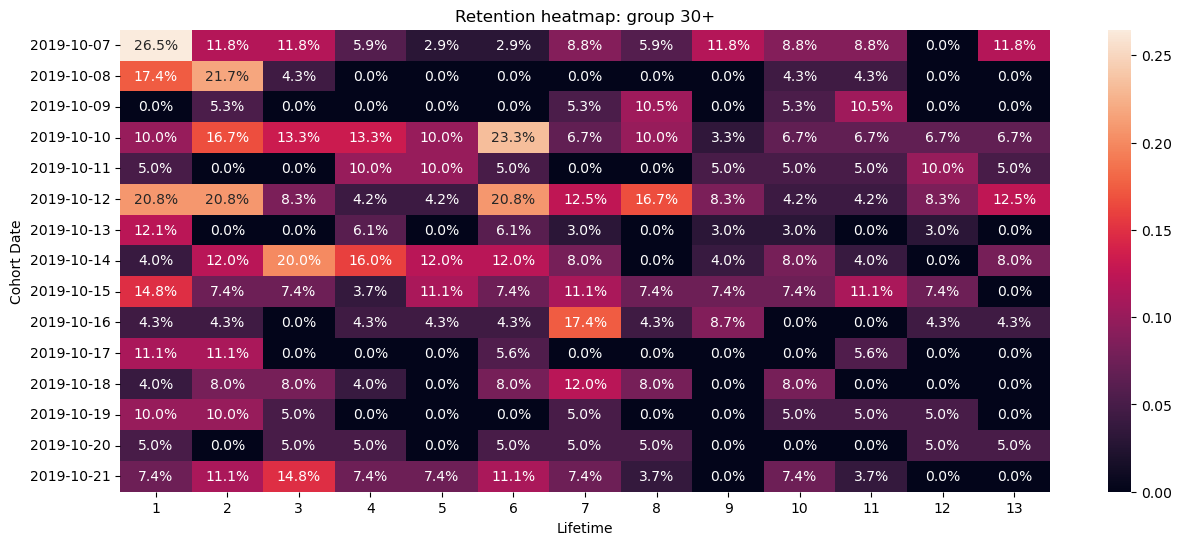

In [98]:
for group in mobile_df['group'].unique():
    
    retention_raw, retention = get_retention(mobile_df.query('group == @group'), 
                                             max_date,                # last day
                                             14,                      # 14 days                   
                                             ignore_horizon=False)   
    
    retention_heatmap(retention, title=('Retention heatmap: group {}'.format(group)))

* `30+` group has the biggest amount of days with zero retention. Which might be logical. If the person spent a lot of time in the app at the begging and found what he needed
* `0-2` group shows very high retention rate during the first 7 days
* `10-30` has rather equal distribution of retention

### `Conversion` in groups

Let's build weekly user conversion graphs by groups and show the amount of unique users per every week

#### Total conversion by groups

In [99]:
conversion = get_conversion(mobile_df, 'group')
plot_conversion(conversion, 'Group')

#### Weekly conversion by groups

In [100]:
for group in mobile_df['group'].unique():
    
    # CR chart
    print('Group:', group)
    conversion = get_conversion(mobile_df.query('group == @group'), 'week')
    plot_conversion(conversion, 'Week')
    
    # table with unique users per week
    print('Unique users by week:')
    display(mobile_df.query('group == @group').groupby('week').agg({'user_id': 'nunique'}).T)
    
    print('')

Group: 2-10


Unique users by week:


week     week 1  week 2  week 3  week 4
user_id     347     404     484     440


Group: 10-30


Unique users by week:


week     week 1  week 2  week 3  week 4
user_id     339     473     420     432


Group: 0-2


Unique users by week:


week     week 1  week 2  week 3  week 4
user_id     261     350     408     349


Group: 30+


Unique users by week:


week     week 1  week 2  week 3  week 4
user_id     183     211     234     195

### Conclusion

**Retention:**
* Shortest sessions `0-2 min` have highest retention on 7th day = 9.0%, 2nd place is for the longest sessions `30+ min` = 6.2%
* In groups `2-10` и `10-30 min` 7th Day retention is = 5.0%
* On 14th day the state between `2-10` and `10-30` changes and `10-30` has RR = 3.4% vs 2.4% in `2-10`
* In general Retention rate in groups decrease is not linear, but wavy. Presumably, users are coming back to app once the need for it appears


**Conversion:**
* Best conversion is in `30+` min group = 27.5%, then `0-2` with CR = 25.6%. Conversion in `2-10`: 19.9%, in `10-30`: 21.6%
* Presumably, high conversion in `0-2` and `30+` is driven by quick-find in first and thorough search in the second group
* Despite overall conversion growth, in groups dynamics is different. We should check conversion growth in groups `0-2` and `2-10` on the additional data

## Hypotheses check

### Yandex vs Google

**Hypothesis 1:** User conversion who installes the app from sources `yandex` and `google` are different

* H_0: User conversion from `yandex` = User conversion from `google`
* H_a: User conversion from `yandex` ≠ User conversion from `google`
* alpha = 0.05

As we compare conversion shares, we should apply **`ztest`**

Let's write the formula for  **`ztest`**

In [101]:
"""
`successes` - [amount of unique users who made an "action" in group A, 
amount of unique users who made an "action" in group B]

`trials`- [total amount of users in group A,
total amount of users in group B]
"""

def z_test(successes1, successes2, trials1, trials2, alpha=0.05):
    p1 = successes1 / trials1
    p2 = successes2 / trials2
    
    print(successes1, successes2, trials1, trials2)

    p_combined = (successes1 + successes2) / (trials1 + trials2)
    difference = p1 - p2

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-value: ', p_value)

    if (p_value < alpha):
        display('Zero-hypothesis is declined. There is a statistical difference in groups')
    else:
        display('Zero-hypothesis is not declined. There is no statistical difference in groups')

Let's find `successes1`, `successes2`, `trials1`, `trials2` for ztest

In [102]:
def successes_trials(df, dim):
    test_sessions = (df.query('event_name == "contacts_show"').groupby(dim).agg({'user_id': 'nunique'})
                     .merge(df.groupby(dim)
                              .agg({'user_id': 'nunique'}), on=dim, how='left')
                              .rename(columns={'user_id_x': 'successes',
                                               'user_id_y': 'trials'})
                    )
    return test_sessions

In [103]:
test_sessions = successes_trials(mobile_df, 'source')
test_sessions

successes  trials
source                   
google        275    1129
other         228    1230
yandex        478    1934

Now check hypothesis

In [104]:
z_test(test_sessions.loc['google', 'successes'], 
       test_sessions.loc['yandex', 'successes'], 
       test_sessions.loc['google', 'trials'], 
       test_sessions.loc['yandex', 'trials'])

275 478 1129 1934
p-value:  0.8244316027993777


'Zero-hypothesis is not declined. There is no statistical difference in groups'

* We couldn't decline H_0 of equality between two conversions of users who came from Yandex and Google

### Photo show impact

**Hypothesis 2:** User conversion between users who saw photos and not - is different

* H_0: User conversion with `photos_show` = User conversion without `photos_show`
* H_a: User conversion with `photos_show` ≠ User conversion without `photos_show`
* alpha = 0.05


Let's separate mark users who saw photos and not

In [114]:
# the ones who saw with True
yes_show = (
mobile_df.query('event_name == "photos_show"')
          .groupby(['user_id', 'session_id'])
          .count()
          .reset_index()[['user_id', 'session_id']]
)

yes_show['photos_show'] = True
yes_show

user_id  session_id  photos_show
0     00157779-810c-4498-9e05-a1e9e3cedf93           1         True
1     00157779-810c-4498-9e05-a1e9e3cedf93           2         True
2     00157779-810c-4498-9e05-a1e9e3cedf93           3         True
3     00157779-810c-4498-9e05-a1e9e3cedf93           4         True
4     00157779-810c-4498-9e05-a1e9e3cedf93           5         True
...                                    ...         ...          ...
2521  ff1554b5-919e-40b1-90bb-ee1f7f6d5846           1         True
2522  ffc01466-fdb1-4460-ae94-e800f52eb136           1         True
2523  ffe68f10-e48e-470e-be9b-eeb93128ff1a           1         True
2524  ffe68f10-e48e-470e-be9b-eeb93128ff1a           2         True
2525  ffe68f10-e48e-470e-be9b-eeb93128ff1a           3         True

[2526 rows x 3 columns]

In [106]:
# let's add this marker in `mobile_df`. If not True, than False
mobile_df = mobile_df.merge(yes_show, on=['user_id', 'session_id'], how='left').fillna(False)

In [107]:
mobile_df.head()

user_id source event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   
4  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  other  tips_show   

                  event_time  session_id        date  weekday    week  \
0 2019-10-07 13:39:45.989359           1  2019-10-07        0  week 1   
1 2019-10-07 13:40:31.052909           1  2019-10-07        0  week 1   
2 2019-10-07 13:41:05.722489           1  2019-10-07        0  week 1   
3 2019-10-07 13:43:20.735461           1  2019-10-07        0  week 1   
4 2019-10-07 13:45:30.917502           1  2019-10-07        0  week 1   

                    first_ts  lifetime  first_date group  photos_show  
0 2019-10-07 13:39:45.989359         0  2019-10-07  2-10        False  
1 2019-10-07 13:39:45.989359         0  2019-10-07  2-10        False  
2 2019-10-07 13:39:45.989359         0  2019-10-07  2-10        False  
3 2019-10-07 13:39:45.989359         0  2019-10-07  2-10        False  
4 2019-10-07 13:39:45.989359         0  2019-10-07  2-10        False

Now we have indicator. Let's check unique users who saw and didn't the photos

In [108]:
photos_users = (
pd.pivot_table(mobile_df, 
               index='user_id', 
               columns='photos_show', 
               aggfunc={'photos_show': 'sum'}).reset_index(col_level=1)
    )

photos_users.columns = ['user_id', 'noshow', 'show']
photos_users.query('noshow.notnull() & show.notnull()')

user_id  noshow  show
1     00157779-810c-4498-9e05-a1e9e3cedf93     0.0  70.0
4     00551e79-152e-4441-9cf7-565d7eb04090     0.0   1.0
10    00753c79-ea81-4456-acd0-a47a23ca2fb9     0.0  17.0
34    01d283e1-cb1c-407a-a4e0-9f72f3deecca     0.0   9.0
47    030fbe1b-7e5b-49a4-af82-570189847f10     0.0   2.0
...                                    ...     ...   ...
4241  fc70e232-134b-4880-9313-bf1c0919e91d     0.0  17.0
4246  fcd6ca44-af2d-4d54-9cc8-0e625f3fa9ae     0.0   2.0
4251  fd0bc38a-3c2d-4d12-9de2-b6b52c17177c     0.0   3.0
4262  fd9b3591-9dd3-48c4-804d-cbcbb9a3b8da     0.0   4.0
4284  ff1554b5-919e-40b1-90bb-ee1f7f6d5846     0.0   2.0

[341 rows x 3 columns]

341 user appeared in both groups. Let's seperate them under var `duplicated_users`

In [109]:
duplicated_users = list(photos_users.query('noshow.notnull() & show.notnull()')['user_id'])

duplicated_users

['00157779-810c-4498-9e05-a1e9e3cedf93',
 '00551e79-152e-4441-9cf7-565d7eb04090',
 '00753c79-ea81-4456-acd0-a47a23ca2fb9',
 '01d283e1-cb1c-407a-a4e0-9f72f3deecca',
 '030fbe1b-7e5b-49a4-af82-570189847f10',
 '037c3a07-9382-41ef-881a-90b6a55eaa9b',
 '03bef3ef-cce8-46ed-8c70-414b6b0486fb',
 '042ebe74-a35b-41d5-abf8-ef6786918951',
 '06322fa8-a60f-486f-862c-df21ce5bbb83',
 '06d168a5-79d3-45ad-906e-872ef5de936f',
 '07efcf91-4d1a-45c4-aba3-6590bb22ec52',
 '07eff6a2-4b3c-4f16-8fa0-87b5731d3ab2',
 '082fdad3-ec9a-48f6-89c8-ecd28bbc09e0',
 '08ff0fce-e12b-4f7e-8680-34e105f7f537',
 '09313359-30a5-40c4-bf1f-f16acd21e99a',
 '0a21a0ed-4478-4dd3-beb5-eac850063186',
 '0a9efcb4-c2c5-4440-ac37-5bf5323bed02',
 '0ae3d388-826c-480d-a3db-066591bc94a7',
 '0afc1e37-b1a7-49ff-b945-be564743dc99',
 '0c01df72-689e-4a2c-bb76-518a8d1d22b1',
 '0d85d9de-7d8c-4fe0-8729-b558d1bd1669',
 '0f676893-b238-4a16-b135-6c98708c51d7',
 '0fcdbd5f-8eee-403c-9290-7e6ccbddb5aa',
 '0fd90f01-285d-4ac7-9ae4-cbaa96dae042',
 '10d0cef5-b61b-

Now check the % of total distribution

In [110]:
len(duplicated_users) / mobile_df['user_id'].nunique()

0.07943163289075239

Almost 8%. But acceptable for the further analysis

Now calculate `successes` / `trials` and check hypothesis (excluding crossings between groups)

In [115]:
test_sessions = successes_trials(mobile_df[~mobile_df['user_id'].isin(duplicated_users)], 'photos_show')
test_sessions

successes  trials
photos_show                   
False              642    3198
True               152     754

In [116]:
z_test(test_sessions.loc[False, 'successes'], 
       test_sessions.loc[True, 'successes'], 
       test_sessions.loc[False, 'trials'], 
       test_sessions.loc[True, 'trials'])

642 152 3198 754
p-value:  0.9586495047013344


'Zero-hypothesis is not declined. There is no statistical difference in groups'

In [117]:
# now conversion in groups
get_conversion(mobile_df[~mobile_df['user_id'].isin(duplicated_users)], 'photos_show')

cr %
photos_show           
False        20.075047
True         20.159151

* Zero hypothesis is not declined, so there is no statistical difference between the ones who saw and did not see the photos

### Conclusion

**Hypothesis 1**: "User conversion from Yandex and Google is different"
* There is **no statistical difference** in conversions between sources

**Hypothesis 2**: "User conversion between users who saw and did not saw photos - is different"
* There is **no statistical difference** in conversions between groups with `photos_show` action and not

## Final conclusion

### Data preprocessing

* We got 2 datasets without mistakes, missing values and duplicates (+ to data collection team 🔥)
* We made data split by sessions using `30-min` idle interval between actions
* Merged datasets (sessions and sources) in one and rearranged columns
* Data could be potentially filled with:
    * metric description of actions `search_1-7`, 
    * sales, 
    * behavioral logic description of a user in the app:
        * what is the consiquence of actions
        * what user sees at each step (tips, photos)

### Exploratory data analysis

* Analyzed period is **28 days** (4 full weeks from Monday to Sunday)
* The amount of sessions during 4 weeks increased from 1900 (1st week) to 2900 on average at 3-4th weeks
* Highest user activity is during Mon-Thu: 1535-1583 sessions. On Saturday is lowest: 1279
* By sources: 45% came from Yandex, 26% from Google and 29% from others
* Next-day retention is at the range 7-17%
* Retention at 7th day is at the range 2.5% - 9.4%, at 14th day 0.6% - 6.5%
* Average time spent in the app is `14 min`, 75% of all sessions are up to 20 min. The most frequent sessions are around-zero, might be driven by quick app opening or by mistake
* The most frequent action is `tips_show` (recommended ads). I think that is what every see when open the app. Then goes `photos_show` (maybe it's possible to look at the photo with opening full product ad as after follows `advert_open`and `contacts_show`)
* Conversion during 28 ays is pretty stable and at the range of 14.8 - 22.4%, during 4 week it grew from 19.3% to 21%. By weekday highest CR is on Friday 21.4%, lowest is on Monday 17.5%

### Analysis in group

**Analysis methodology:**
* Groups were divided by 1st session duration criteria as the first experience usually defines future actions and behaviour
* 4 groups devided into intervals:
    * ultra-short: up to 2 min
    * short: 2-10 min
    * average: 10-30 min
    * long: from 30 min
* In groups were analyzed *Retention* and *Conversion*


**Retention:**
* Shortest sessions `0-2 min` have highest retention on 7th day = 9.0%, 2nd place is for the longest sessions `30+ min` = 6.2%
* In groups `2-10` и `10-30 min` 7th Day retention is = 5.0%
* On 14th day the state between `2-10` and `10-30` changes and `10-30` has RR = 3.4% vs 2.4% in `2-10`
* In general Retention rate in groups decrease is not linear, but wavy. Presumably, users are coming back to app once the need for it appears


**Conversion:**
* Best conversion is in `30+` min group = 27.5%, then `0-2` with CR = 25.6%. Conversion in `2-10`: 19.9%, in `10-30`: 21.6%
* Presumably, high conversion in `0-2` and `30+` is driven by quick-find in first and thorough search in the second group
* Despite overall conversion growth, in groups dynamics is different. We should check conversion growth in groups `0-2` and `2-10` on the additional data

### Hypothesis check

We had 2 hypotheses to check:

**Hypothesis 1**: "User conversion from Yandex and Google is different"
* There is **no statistical difference** in conversions between sources

**Hypothesis 2**: "User conversion between users who saw and did not saw photos - is different"
* There is **no statistical difference** in conversions between groups with `photos_show` action and not